<a href="https://colab.research.google.com/github/pachterlab/CP_2022/blob/main/notebooks/VMHNeurons/kimetal_smartseq_picasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import os

from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
	url = 'https://api.datacite.org/dois/'+doi+'/media'
	r = requests.get(url).json()
	netcdf_url = r['data'][0]['attributes']['url']
	r = requests.get(netcdf_url,stream=True)
	#Set file name
	fname = doi.split('/')[-1]+ext
	#Download file with progress bar
	if r.status_code == 403:
		print("File Unavailable")
	if 'content-length' not in r.headers:
		print("Did not get file")
	else:
		with open(fname, 'wb') as f:
			total_length = int(r.headers.get('content-length'))
			pbar = tnrange(int(total_length/1024), unit="B")
			for chunk in r.iter_content(chunk_size=1024):
				if chunk:
					pbar.update()
					f.write(chunk)
		return fname


#smartseq VMH data
#metadata.csv
download_file('10.22002/D1.2067','.gz')

#smartseq.mtx (log counts)
download_file('10.22002/D1.2071','.gz')



os.system("gunzip *.gz")

os.system("mv D1.2067 metadata.csv")
os.system("mv D1.2071 smartseq.mtx")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


  0%|          | 0/64 [00:00<?, ?B/s]

  0%|          | 0/26700 [00:00<?, ?B/s]

0

In [ ]:
!git clone https://github.com/hhcho/densvis.git

Cloning into 'densvis'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 145 (delta 78), reused 95 (delta 38), pack-reused 0
Receiving objects: 100% (145/145), 412.94 KiB | 4.75 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
%cd /content/densvis/densne/

/content/densvis/densne


In [ ]:
!g++ sptree.cpp densne.cpp densne_main.cpp -o den_sne -O2
import densne

densne.cpp: In function ‘bool DENSNE::load_data(double**, int*, int*, int*, double*, double*, int*, int*, double*, double*, bool*, double**)’:
densne.cpp:961:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(n, sizeof(int), 1, h);                                            // number of datapoints
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:962:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(d, sizeof(int), 1, h);                                            // original dimensionality
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:963:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(theta, sizeof(double), 1, h);                                        // gradient accuracy
   ~~~~~^~~~~~~~~~

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/pachterlab/CP_2022.git

Cloning into 'CBP_2021'...
remote: Enumerating objects: 554, done.
remote: Counting objects: 100% (554/554), done.
remote: Compressing objects: 100% (509/509), done.
remote: Total 554 (delta 337), reused 86 (delta 25), pack-reused 0
Receiving objects: 100% (554/554), 81.58 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (337/337), done.


In [ ]:
%cd /content/CP_2022/scripts

/content/CBP_2021/scripts


In [ ]:
!pip3 install --quiet torch
!pip3 install --quiet anndata
!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn
!pip3 install --quiet torchsummary
!pip install --quiet scanpy==1.6.0
!pip3 install --quiet umap-learn

     |████████████████████████████████| 127 kB 5.4 MB/s 
     |████████████████████████████████| 7.7 MB 5.4 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


## **Install Packages**

In [ ]:
import anndata 
import pandas as pd
import numpy as np

import visualizations as vis
import tools as tl
from Picasso import Picasso
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
import torch
import time
import scanpy as sc
import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline
sc.set_figure_params(dpi=125)
sns.set_style('white')

## **Import Data**

In [ ]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '/content'

pcs = 50
n_latent = 50

In [ ]:
count_mat = sio.mmread(data_path+'/smartseq.mtx')
count_mat.shape

(3850, 1999)

In [ ]:
#Center and scale log-normalized data
scaled_mat = scale(count_mat)

In [ ]:
meta = pd.read_csv(data_path+'/metadata.csv',index_col = 0)
meta.head()

sample_name  ...  pass_mito_filter
SM-GE4R2_S062_E1-50  SM-GE4R2_S062_E1-50  ...              True
SM-GE4SI_S356_E1-50  SM-GE4SI_S356_E1-50  ...              True
SM-GE4SI_S172_E1-50  SM-GE4SI_S172_E1-50  ...              True
LS-15034_S07_E1-50    LS-15034_S07_E1-50  ...              True
LS-15034_S28_E1-50    LS-15034_S28_E1-50  ...              True

[5 rows x 11 columns]

In [ ]:
print(meta.sex_label.value_counts()[0]/meta.sex_label.value_counts()[1])
print(meta.sex_label.value_counts()[1])

7.406113537117904
458


In [ ]:
lab1 = list(meta.smartseq_cluster)
lab2 = list(meta.sex_label)
lab3 = list(meta.medical_cond_label)


allLabs = np.array([lab1,lab2])

nanLabs = np.array([[np.nan]*len(lab1)])

#Shuffled labels for over-fitting check
shuff_lab1 = random.sample(lab1, len(lab1))  
shuff_lab2 = random.sample(lab2, len(lab2))  
shuff_allLabs = np.array([shuff_lab1,shuff_lab2])

clus_colors = list(pd.unique(meta.smartseq_cluster_color))

sex_colors = ['#abacb7','#F8C471']

Set Ambient Data

In [ ]:
amb = tl.getCentroidDists(count_mat,meta.smartseq_cluster)
ambIntra = tl.getIntraVar(count_mat, meta.smartseq_cluster, meta.sex_label)
ambIntraC = tl.getIntraVar(count_mat, meta.smartseq_cluster, meta.smartseq_cluster)
ambInter = tl.getInterVar(count_mat, meta.smartseq_cluster, meta.sex_label)

In [ ]:
def getAllVars(latents,latentLab,latentType):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]
    d = latentType[p]

    c = tl.getCentroidDists(i, meta.smartseq_cluster)
    intra = tl.getIntraVar(i, meta.smartseq_cluster, meta.sex_label)
    intraC = tl.getIntraVar(i, meta.smartseq_cluster, meta.smartseq_cluster)
    inter = tl.getInterVar(i, meta.smartseq_cluster, meta.sex_label)

    vals += [stats.pearsonr(c, amb)[0],stats.pearsonr(intra, ambIntra)[0], stats.pearsonr(intraC, ambIntraC)[0], stats.pearsonr(inter, ambInter)[0]]
    dist += ['Inter-Type','Intra-Sex','Intra-Type','Inter-Sex'] 

    emb += [l]*4
    dim += [d]*4


  allVals['Latent'] = emb
  allVals['Distance'] = dist
  allVals['Pearsonr'] = vals
  allVals['Dimension'] = dim


  return allVals


In [ ]:
orig_indices = tl.getNeighbors(count_mat, n_neigh = 10,p=1)

In [ ]:
def getAllKNNs(latents,latentLab,latentType):
  emb = []

  frac = []


  knnDF = pd.DataFrame()

  for p in range(len(latents)):
    i = latents[p]
    l = latentLab[p]

    ind = tl.getNeighbors(i, n_neigh = 10,p=1)

    frac += [np.mean(tl.getIntersect(orig_indices,ind))]



    emb += [l]


  knnDF['Fraction'] = frac
  knnDF['Latent'] = emb

  return knnDF

### **PCA Test**

In [ ]:
#PCA 
tsvd = TruncatedSVD(n_components=pcs)
x_pca = tsvd.fit_transform(scaled_mat)

tsvd = TruncatedSVD(n_components=2)
x_pca_2d = tsvd.fit_transform(scaled_mat)

pcaUMAP = reducer.fit_transform(x_pca)
pcaDensUMAP = densUMAP.fit_transform(x_pca)

pcaTSNE = tsne.fit_transform(x_pca)
pcaDensTSNE, ro ,re = densne.run_densne(x_pca,no_dims = ndims, randseed = state)

### **Picasso Analysis**

In [ ]:
rounds = 5 #3 for Picasso KNN
#seeds = [1,2,3,4,42]

In [ ]:
# rounds = 3

In [ ]:
batch_size = 128 #3850
#Make a (unit) circle 
#r = 1
theta = np.linspace(0, 2*np.pi, batch_size)
# #Turkey guy
# x, y = (np.sin(2**theta) - 1.7) * np.cos(theta), (np.sin(2**theta) - 1.7) * np.sin(theta)

# #Butterfly r = 4*cos(4cosθ))
# x, y = (2*np.cos(4*np.cos(theta))) * np.cos(theta), (2*np.cos(4*np.cos(theta))) * np.sin(theta)

# # Spiral
#x, y = (1/2)*theta * np.cos(theta), (1/2)*theta * np.sin(theta)

# #Quasi-rose
x, y = (4 + np.cos(6*theta)) * np.cos(theta), (4 + np.cos(6*theta)) * np.sin(theta)


#Make array input for dimension of shape 
coords = np.array([list(x),list(y)])

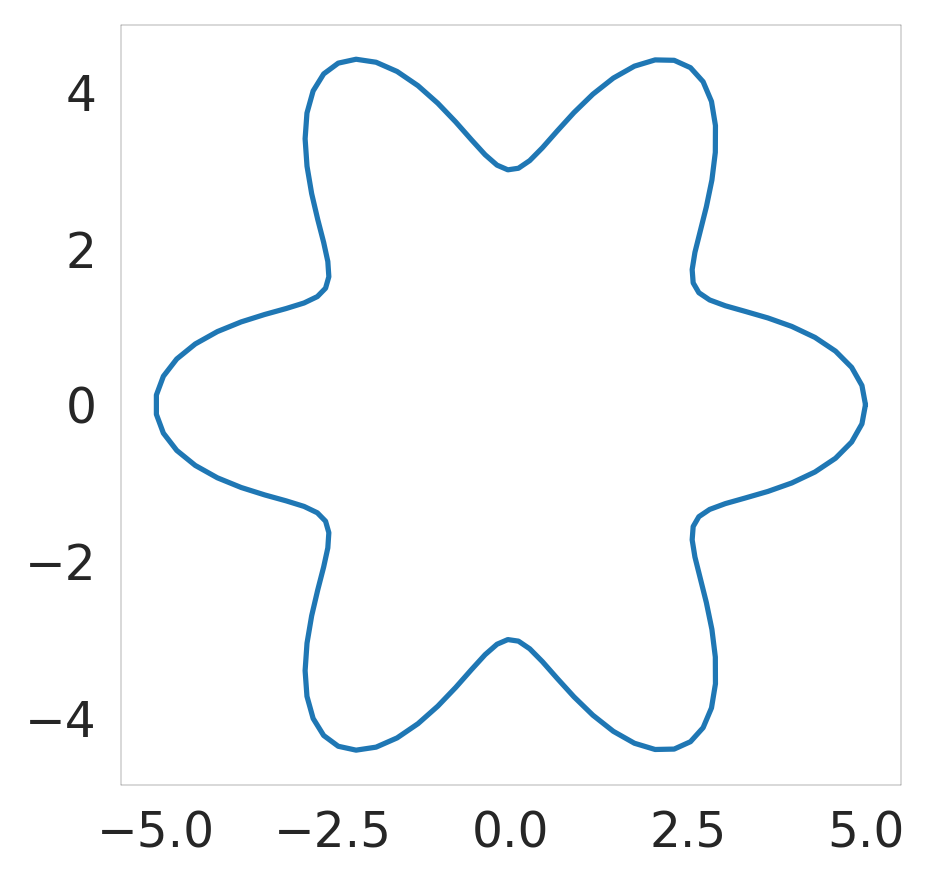

In [ ]:
plt.plot(x,y)

In [ ]:
#Task assignment code
fl = []
flLab = []
flType = []

for i in range(rounds):
  nca = Picasso(n_latent = 2, epochs = 500, batch_size = batch_size) #100
  losses1, latent1 = nca.fit(scaled_mat,coords, frac = 0.2,silent=True,ret_loss=True)

  fl += [latent1]
  flLab += ['Flower']
  flType += ['MCML 2D']






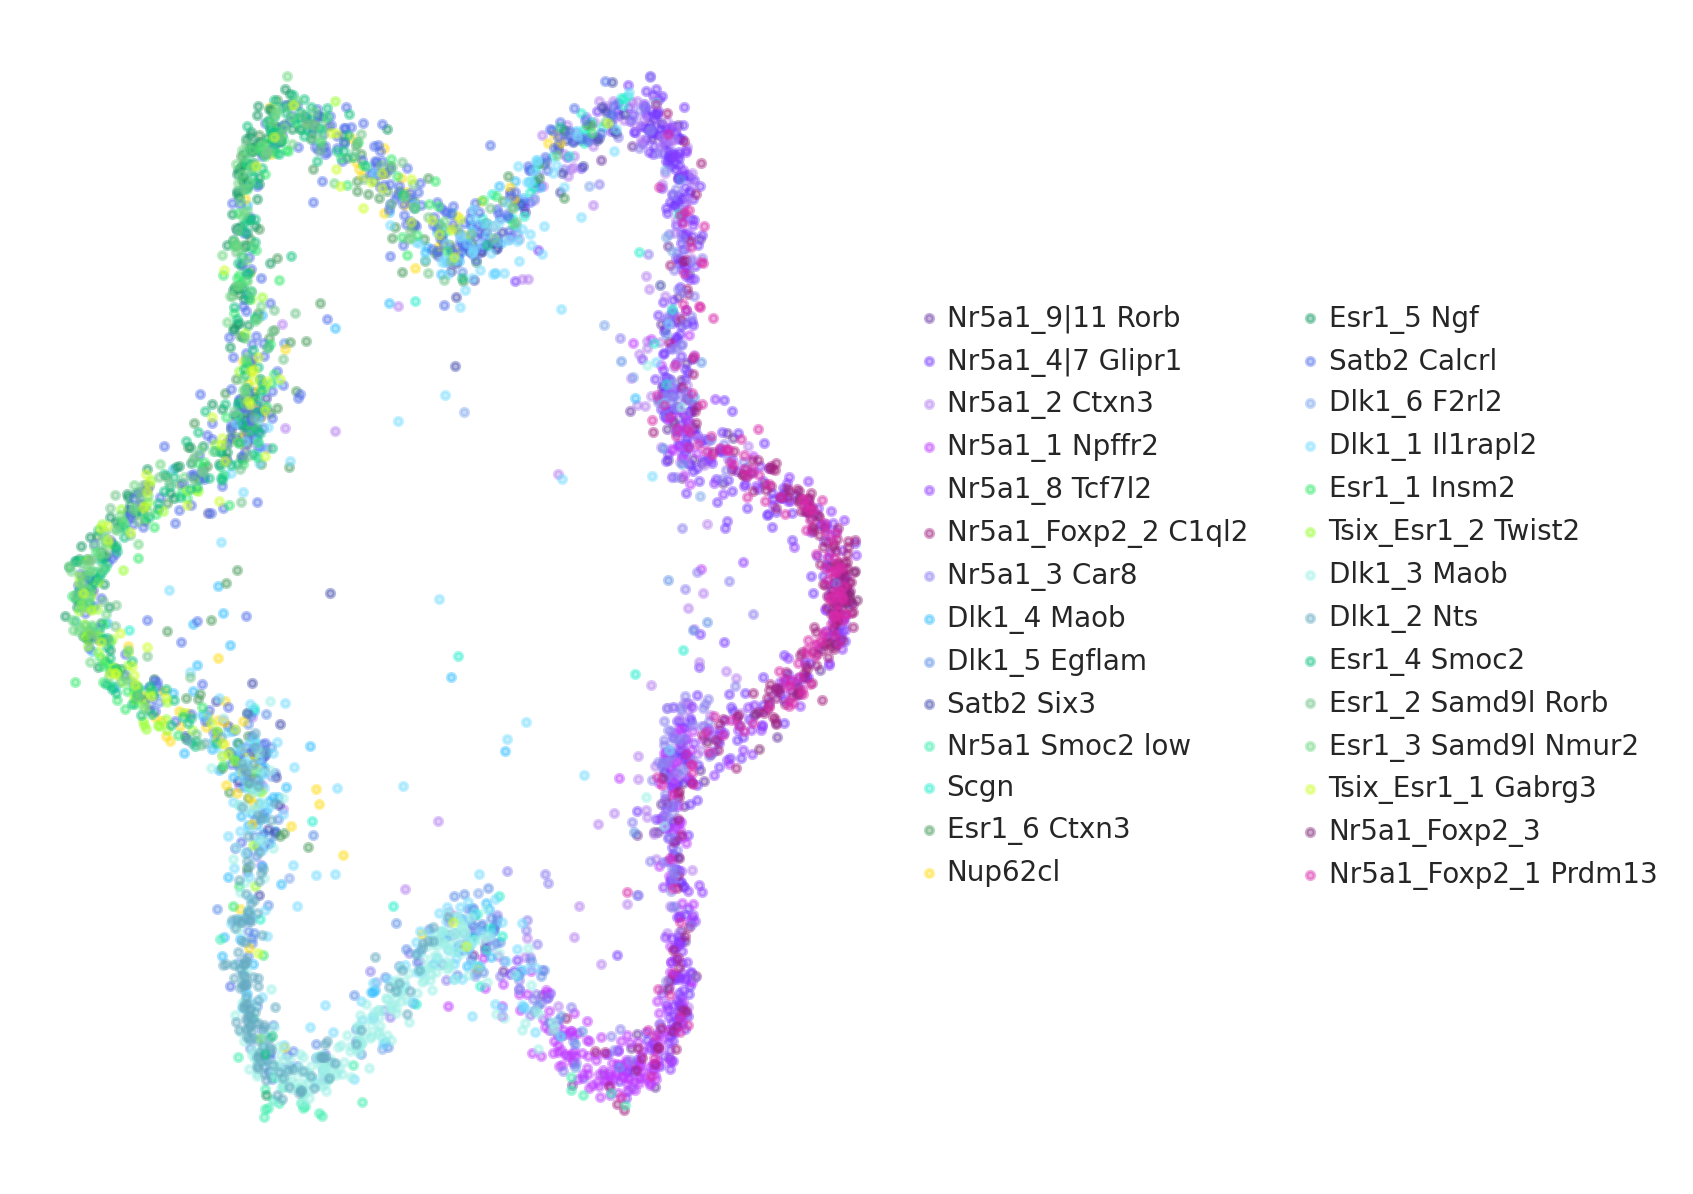

In [ ]:
vis.obj_plot_embed(latent1, meta.smartseq_cluster, fname = '2DNCA.pdf', colors=clus_colors )

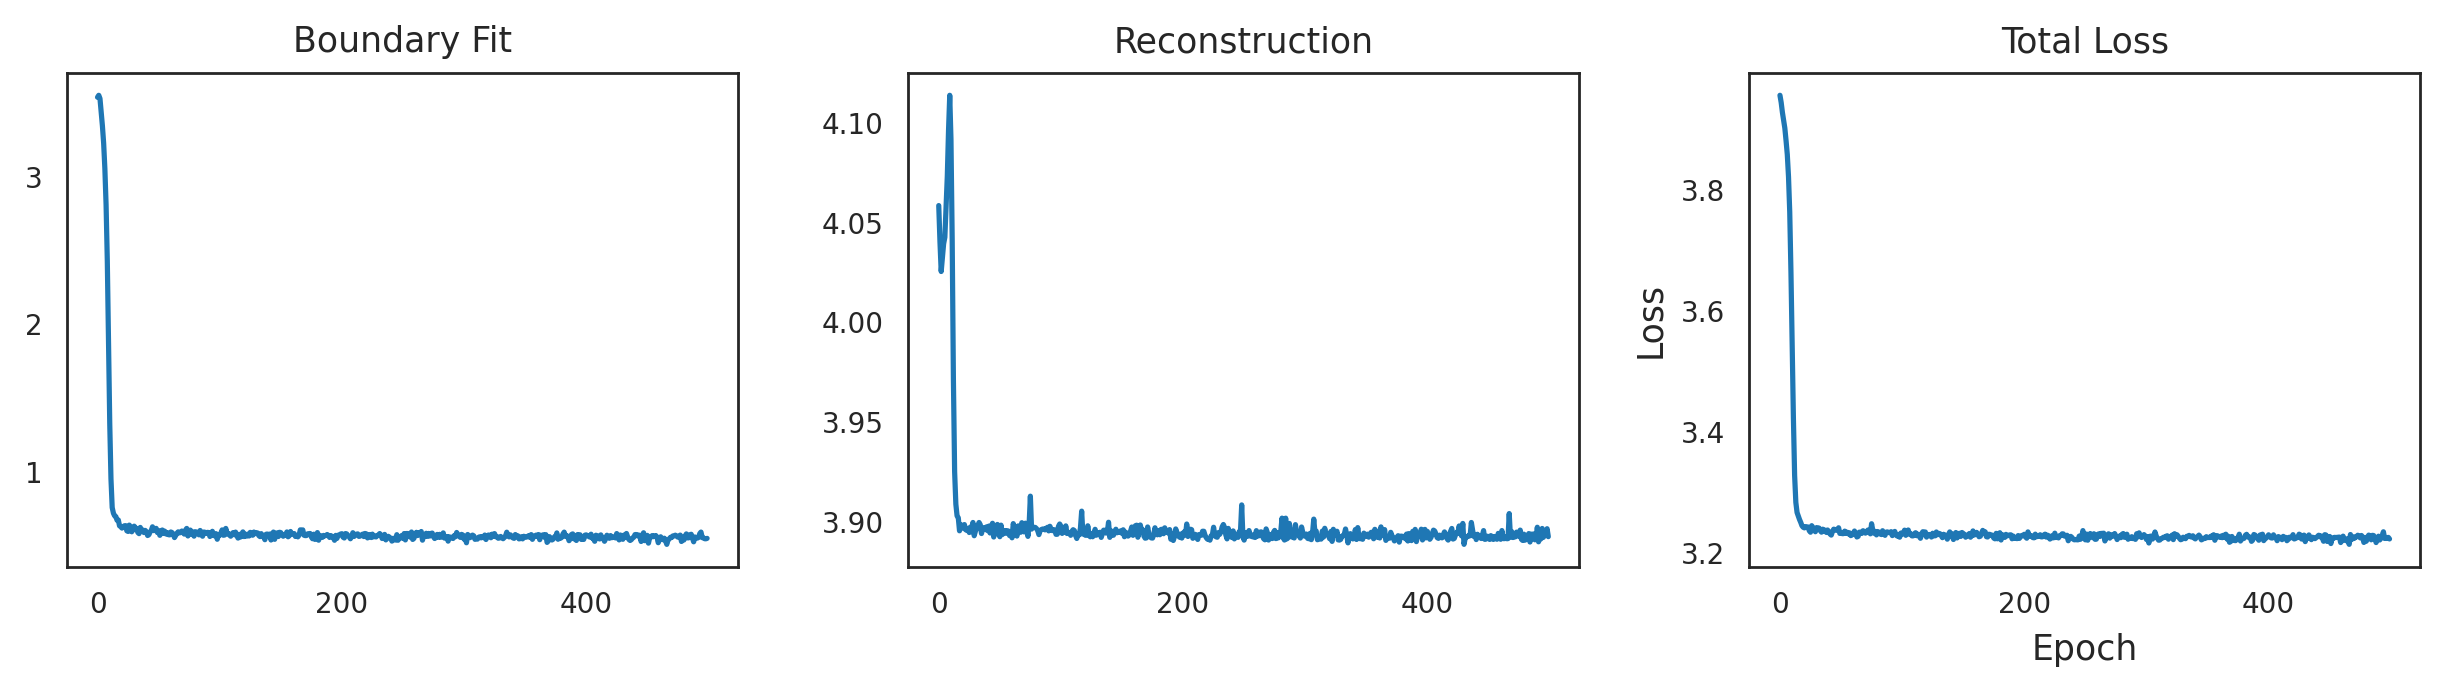

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

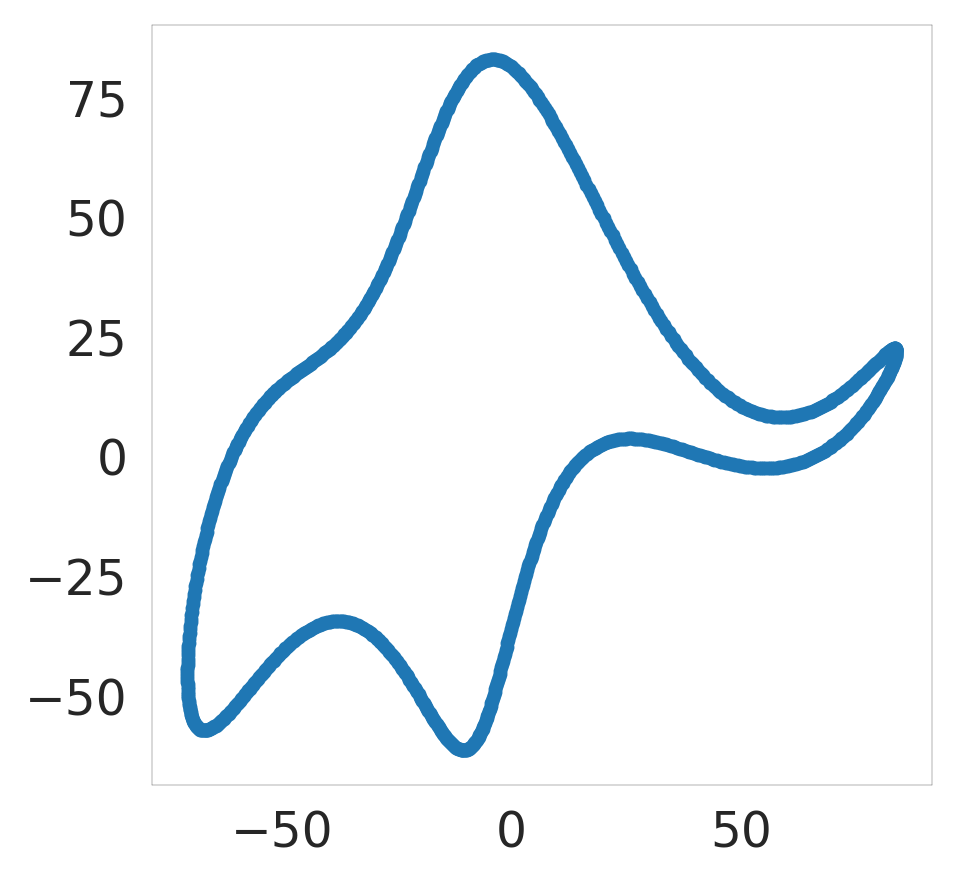

In [ ]:
# elephant parameters
batch_size = 1000 #500 #128 #3850 # 50000 for old code, 3850 for task assignment

p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    # x = np.append(fourier(t,Cx), [-p5.imag]) #[-p5.imag]
    # y = np.append(fourier(t,Cy), [p5.imag]) #[p5.imag]
    x = fourier(t,Cx)
    y = fourier(t,Cy)

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,batch_size), p1, p2, p3, p4, p5)

#Make array input for dimension of shape 

y = y#0.03*y
x = x#0.02*x

coords = np.array([list(y),list(-x)])

plt.plot(y,-x,'.')
plt.show()


In [ ]:
#Task assign
#batch_size = 3850 
#rounds = 5
el = []
elLab = []
elType = []

for i in range(rounds):
  nca = Picasso(n_latent = 2, epochs = 500, batch_size = batch_size)
  lossesEl, latentEl = nca.fit(scaled_mat,coords, frac = 0.15,silent=True,ret_loss=True) #0.04, 0.2 with 1000 pts

  el += [latentEl]
  elLab += ['Elephant']
  elType += ['MCML 2D']




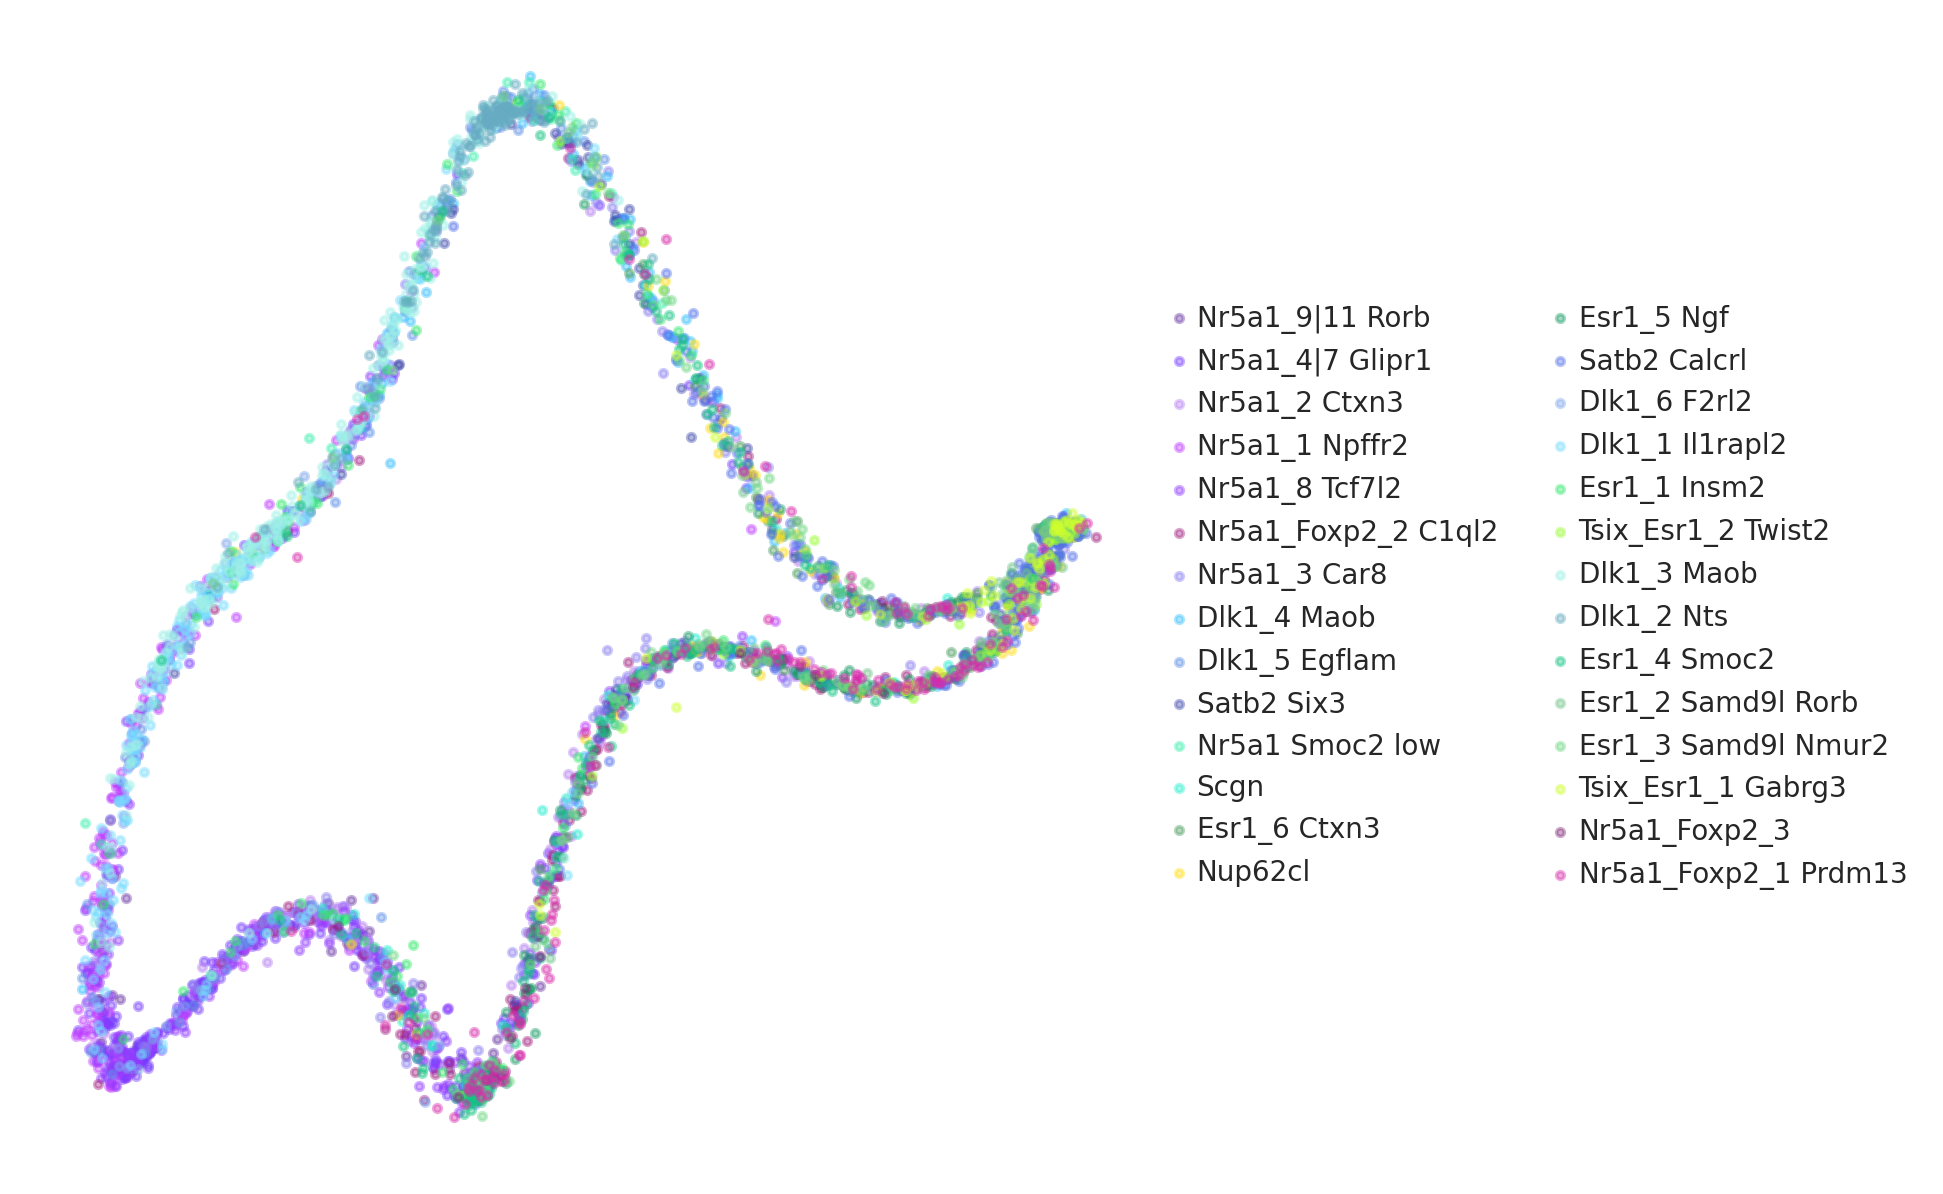

In [ ]:
vis.obj_plot_embed(latentEl, meta.smartseq_cluster, fname = '2DNCA.pdf', colors=clus_colors ,figsize=(8,5))

Save KNN Jaccard Distances

In [ ]:
orig_indices = tl.getNeighbors(count_mat, n_neigh = 30,p=1)

In [ ]:
df = getJac(orig_indices,fl+el, flLab+elLab, 30)
df.to_csv('smartPicAmb.csv')

Flower
0.9457803109775629
Flower
0.9500437799841506
Flower
0.9533410694646128
Elephant
0.9673250618325975
Elephant
0.9663122868556286
Elephant
0.967705133957176


In [ ]:
from google.colab import files
files.download("smartPicAmb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

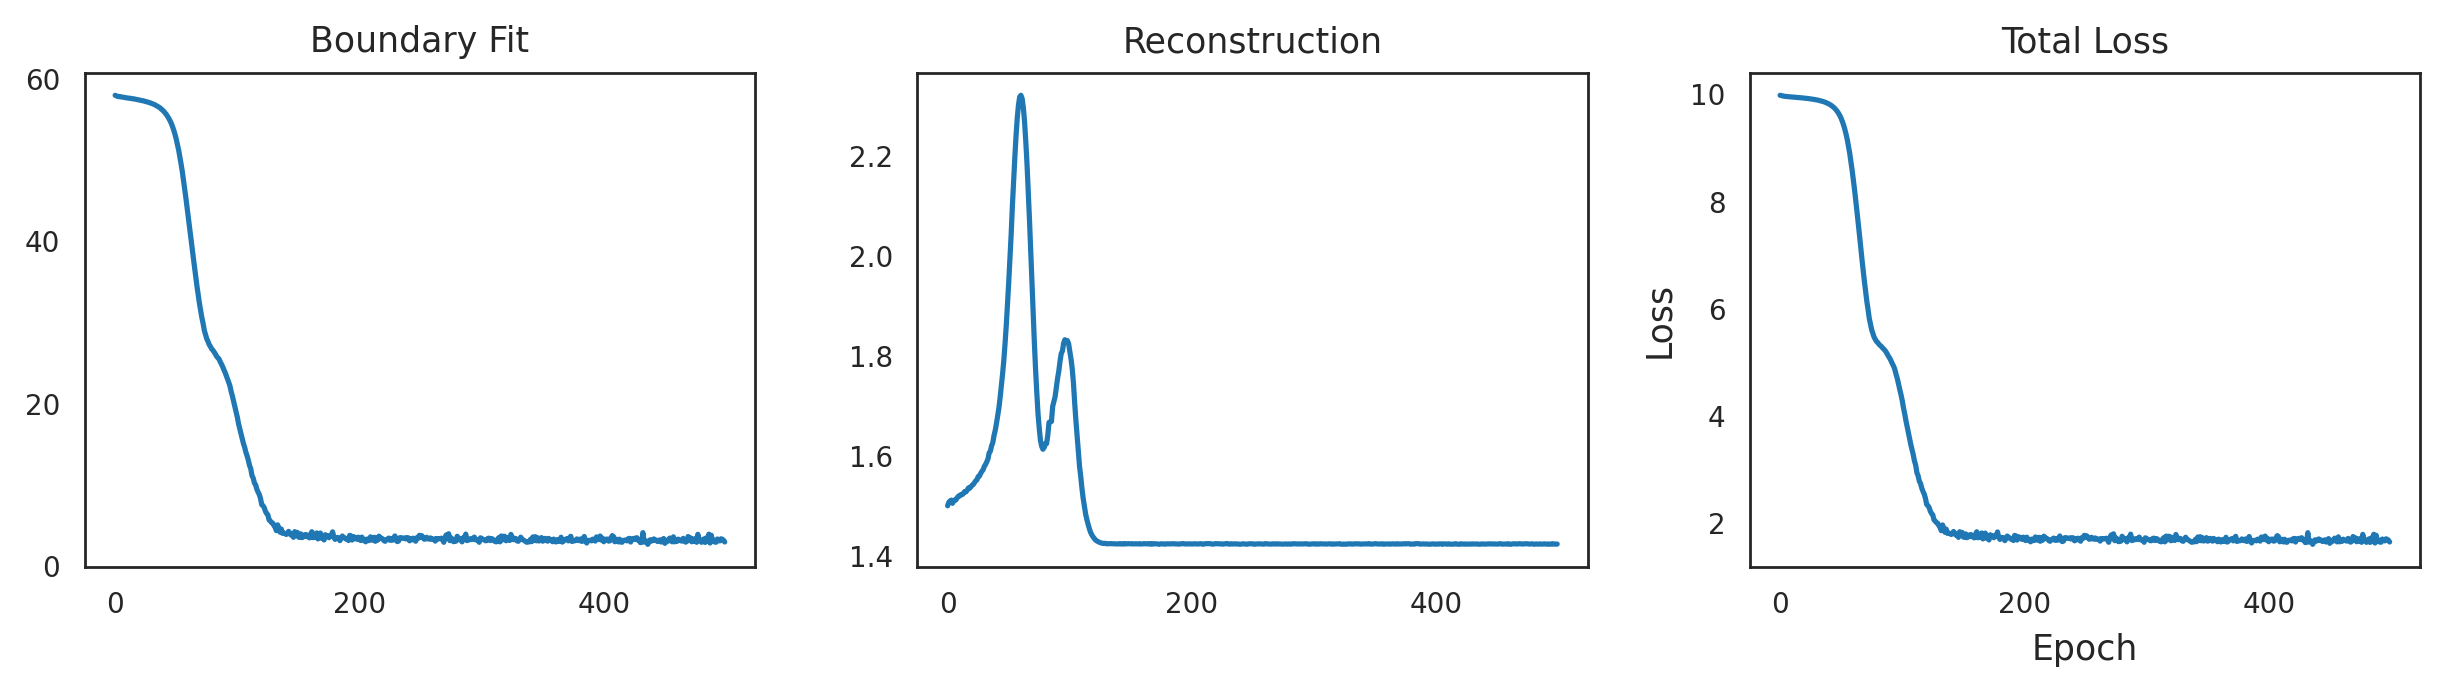

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

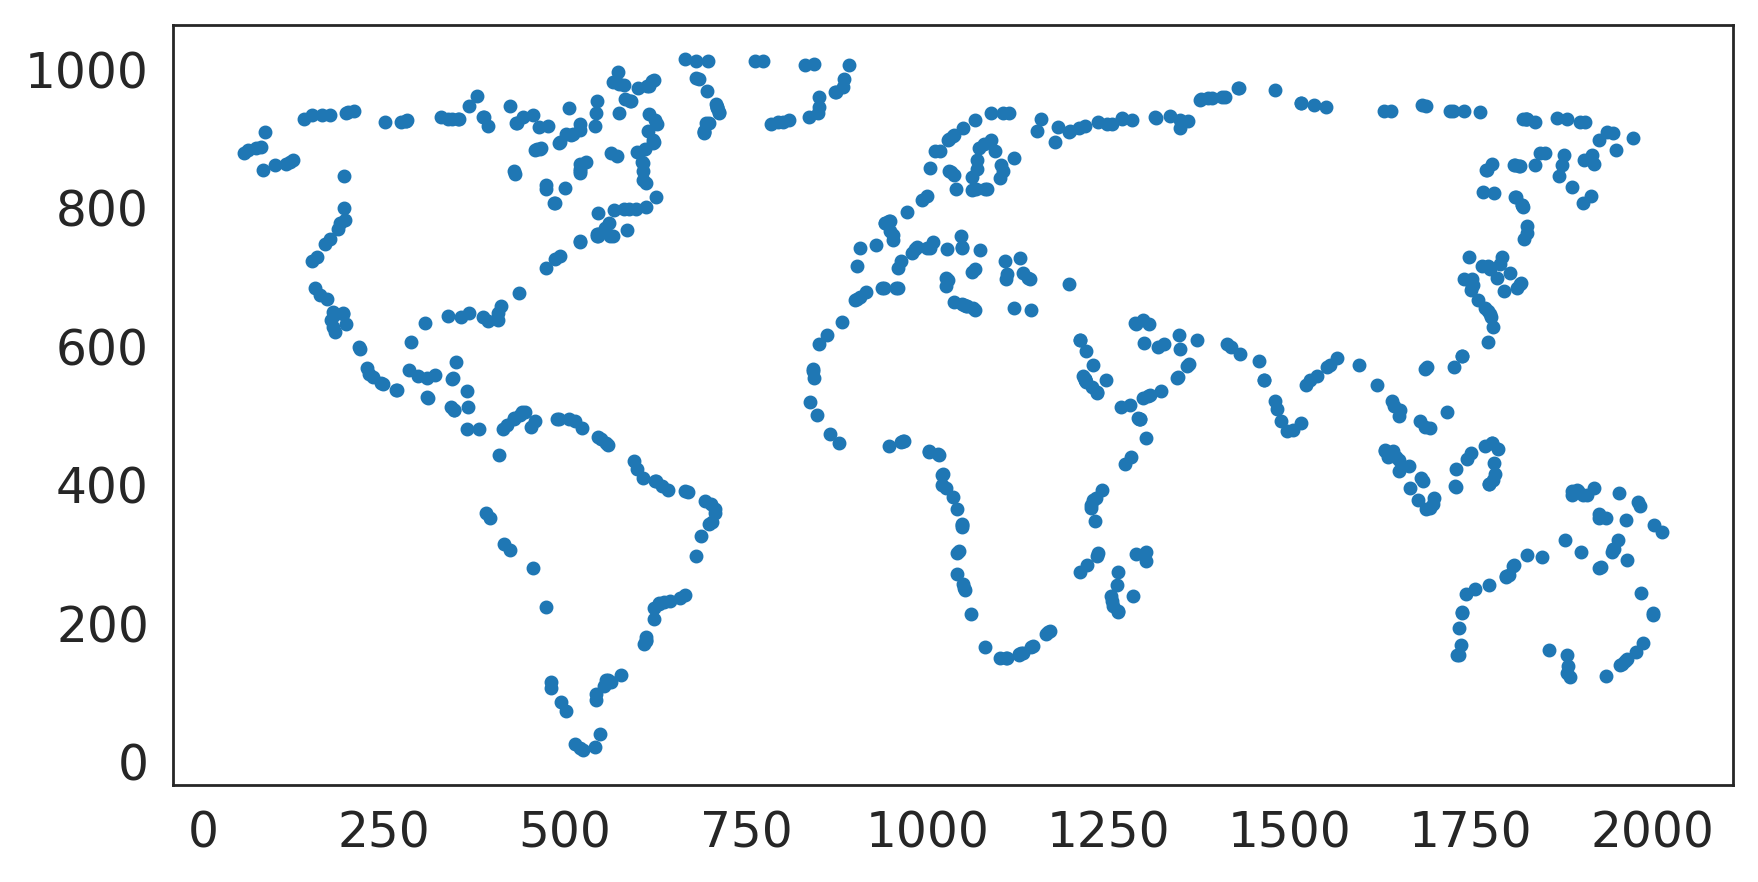

In [ ]:
# Map parameters
pts = pd.read_csv('../data/mapPoints700.csv',header=None)
pts.head()

x = pts[0]
y = pts[1]
coords = np.array([x,y])

plt.figure(figsize=(8,4))
plt.plot(x,y,'.')
plt.show()


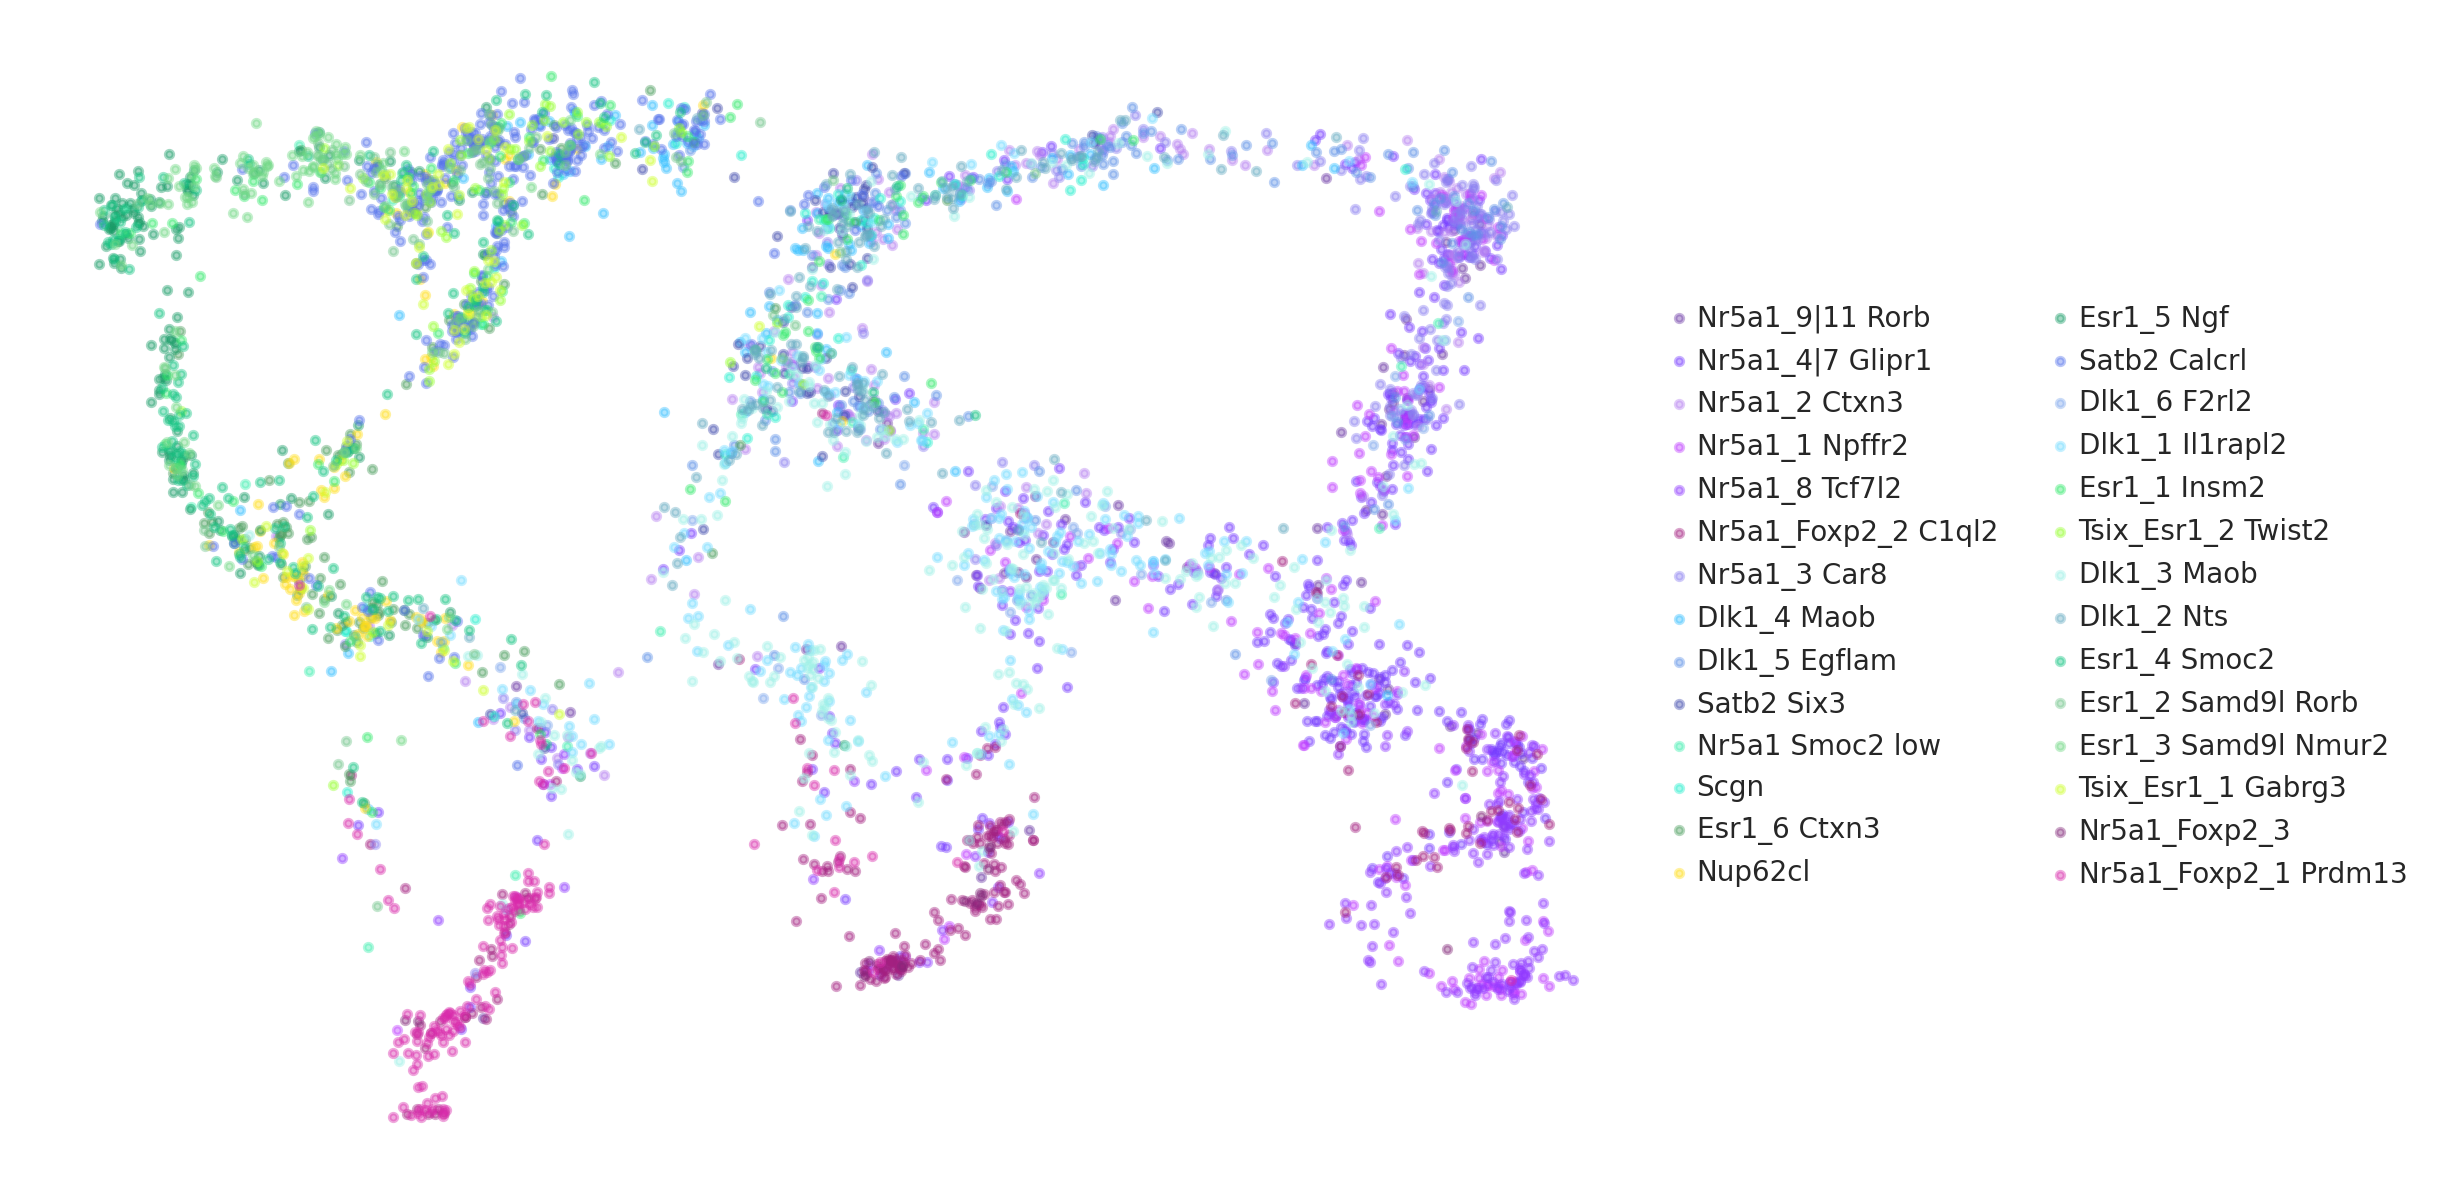

In [ ]:
#Test with task assignment in-utero --> maybe art person 
batch_size = len(x)
rounds = 1

map = []
mapLab = []
mapType = []

for i in range(rounds):
  nca = Picasso(n_latent = 2, epochs = 1000, batch_size = batch_size)
  lossesMap, latentMap = nca.fit(scaled_mat,coords, frac = 0.44,silent=True,ret_loss=True) #44

  map += [latentMap]  
  mapLab += ['Map']
  mapType += ['MCML 2D']


vis.obj_plot_embed(latentMap, allLabs[0], fname = '2DNCA.pdf', colors=clus_colors,figsize=(10,5) )


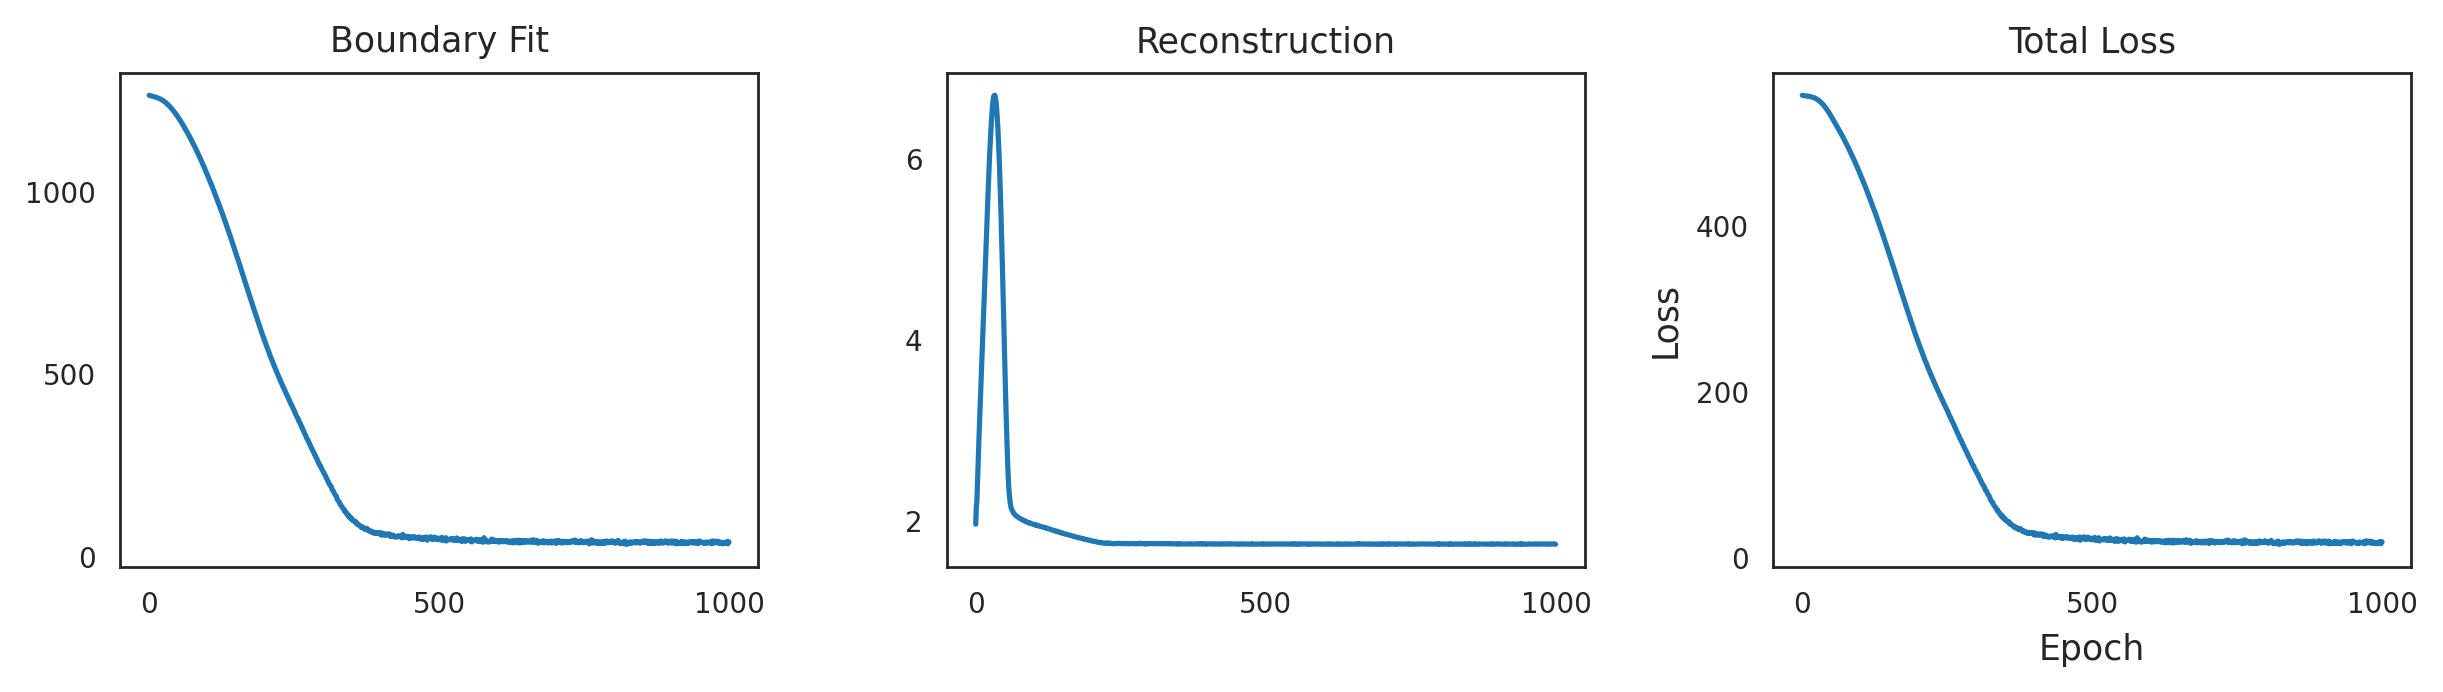

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

In [ ]:
# #Try with no learning
#batch_size = len(x)
rounds = 5

noT = []
noTLab = []
noTType = []

for i in range(rounds):

  nca = Picasso(n_latent = 2, epochs = 0 ) #batch_size = batch_size
  lossesNoT, latentNoT = nca.fit(scaled_mat,coords, frac = 1,silent=True,ret_loss=True)

  noT += [latentNoT]  
  noTLab += ['No Training']
  noTType += ['Picasso 2D']



# vis.obj_plot_embed(latentNoT, meta.smartseq_cluster, fname = '2DNCA.pdf', colors=clus_colors )


Get Latent Space Comparisons (Baselines)

In [ ]:
latents,latentLab,latentType = tl.visComp(scaled_mat, ndims=2, pcs=50)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
def plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10, errwidth=1, figsize =(8,4), dodge=0.4, fname = None):
	plt.figure(figsize=figsize)
	g=sns.pointplot(x='Distance', y='Pearsonr', data=allVals, hue='Latent', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=errwidth, dodge=dodge)
	plt.setp(g.collections, alpha=.6) #for the markers
	plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})

	

	plt.xlabel("Distance Metric",fontsize=axisFontSize)
	plt.ylabel("Pearsonr (to Ambient)",fontsize=axisFontSize)
	plt.xticks(fontsize=tickFontSize)
	plt.yticks(fontsize=tickFontSize)
	plt.tight_layout()

	if(fname != None):
		plt.savefig(fname)
	else:
		plt.show()

Compare no training

In [ ]:
latentsnoT = noT + latents

latentLabnoT = noTLab + latentLab

latentTypenoT = noTType + latentType

In [ ]:
allVals = getAllVars(latentsnoT,latentLabnoT,latentTypenoT )
allVals = allVals[~allVals['Latent'].isin(['PCA 50D'])]

In [ ]:
allVals['Latent'] = [i.replace('TSNE','t-SNE') for i in allVals['Latent']]
allVals['Latent'] = [i.replace('densSNE','dens-SNE') for i in allVals['Latent']]

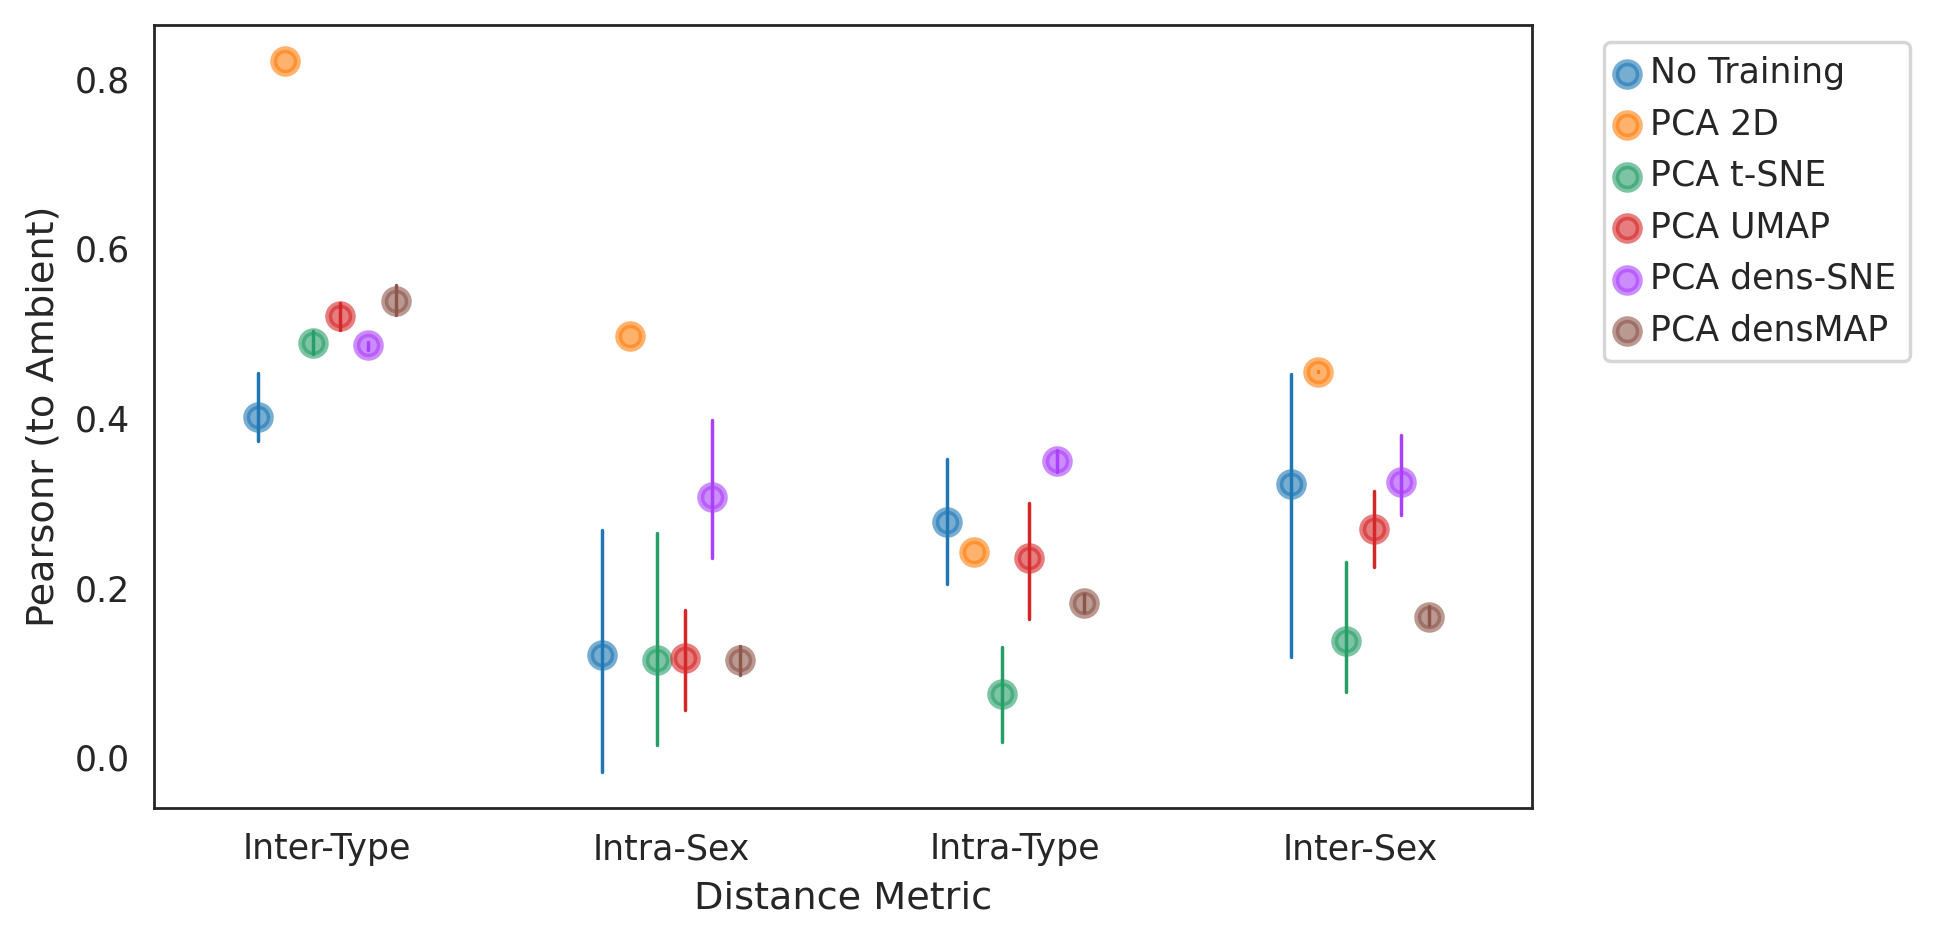

In [ ]:
plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10)

Compare Flower Embedding Accuracy

In [ ]:
latents = fl + latents

latentLab = flLab + latentLab

latentType = flType + latentType

In [ ]:
allVals = getAllVars(latents,latentLab,latentType)
allVals = allVals[~allVals['Latent'].isin(['PCA 50D','Elephant'])]

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

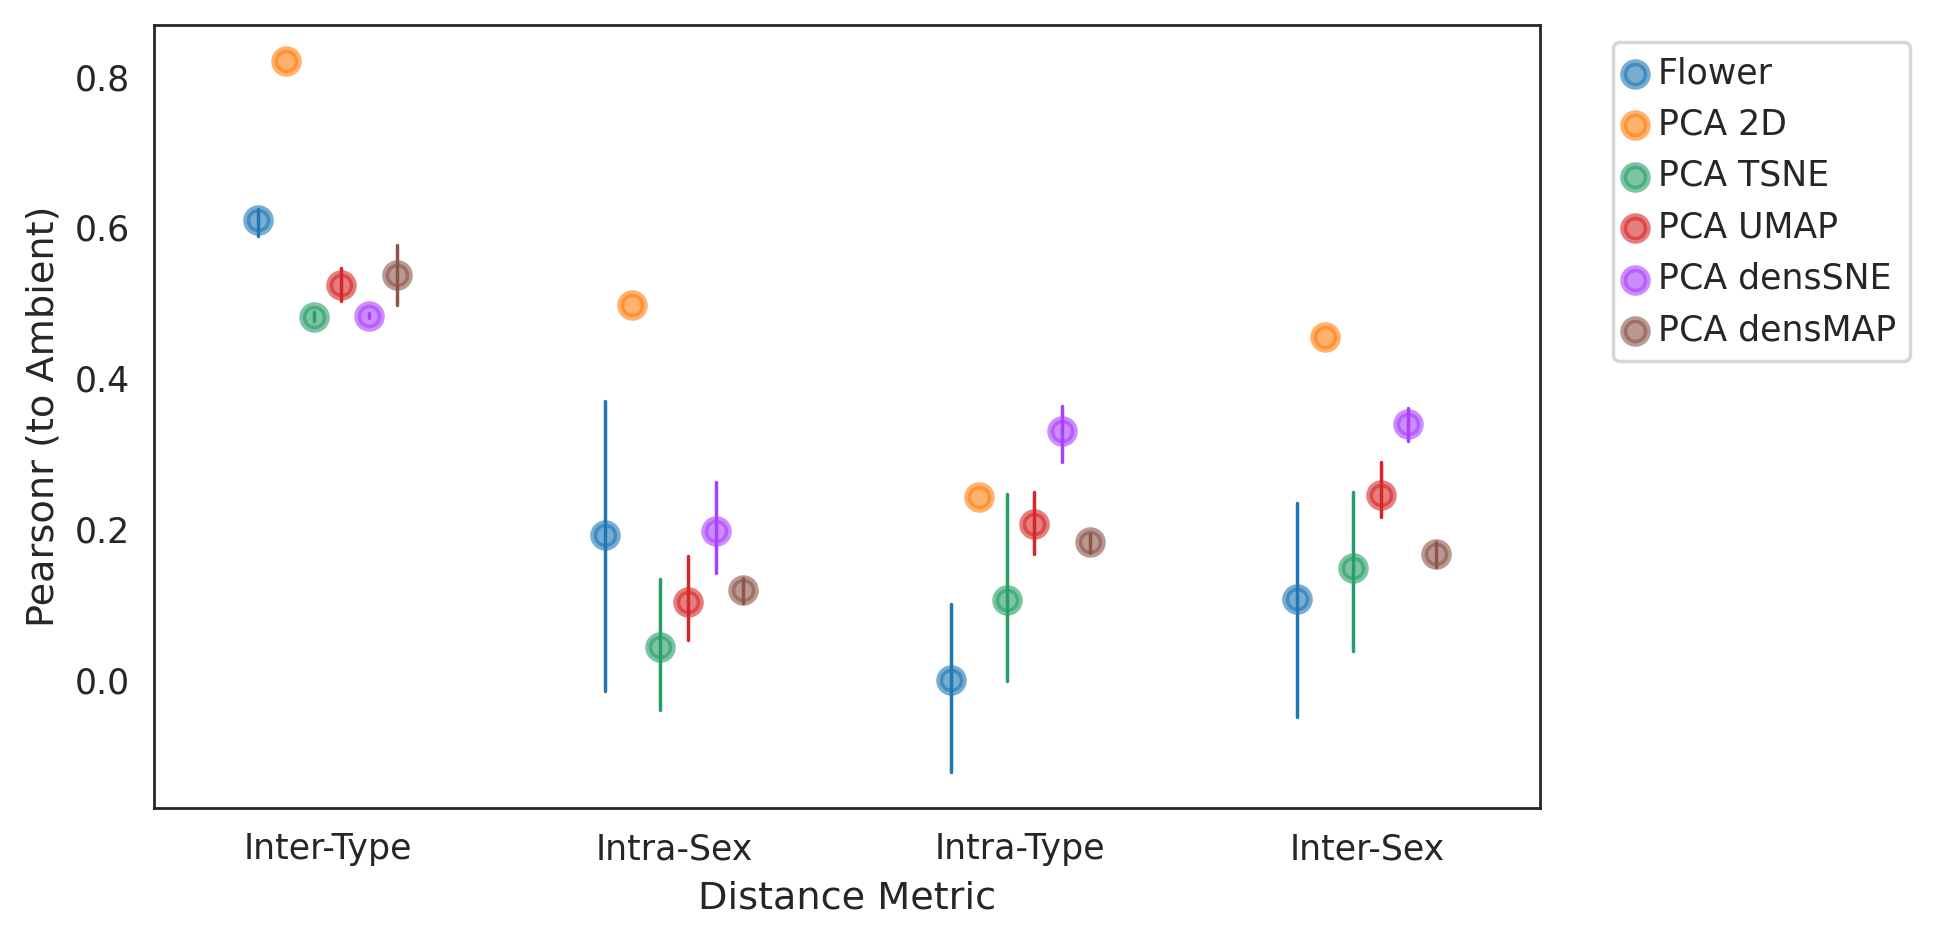

In [ ]:
plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10)

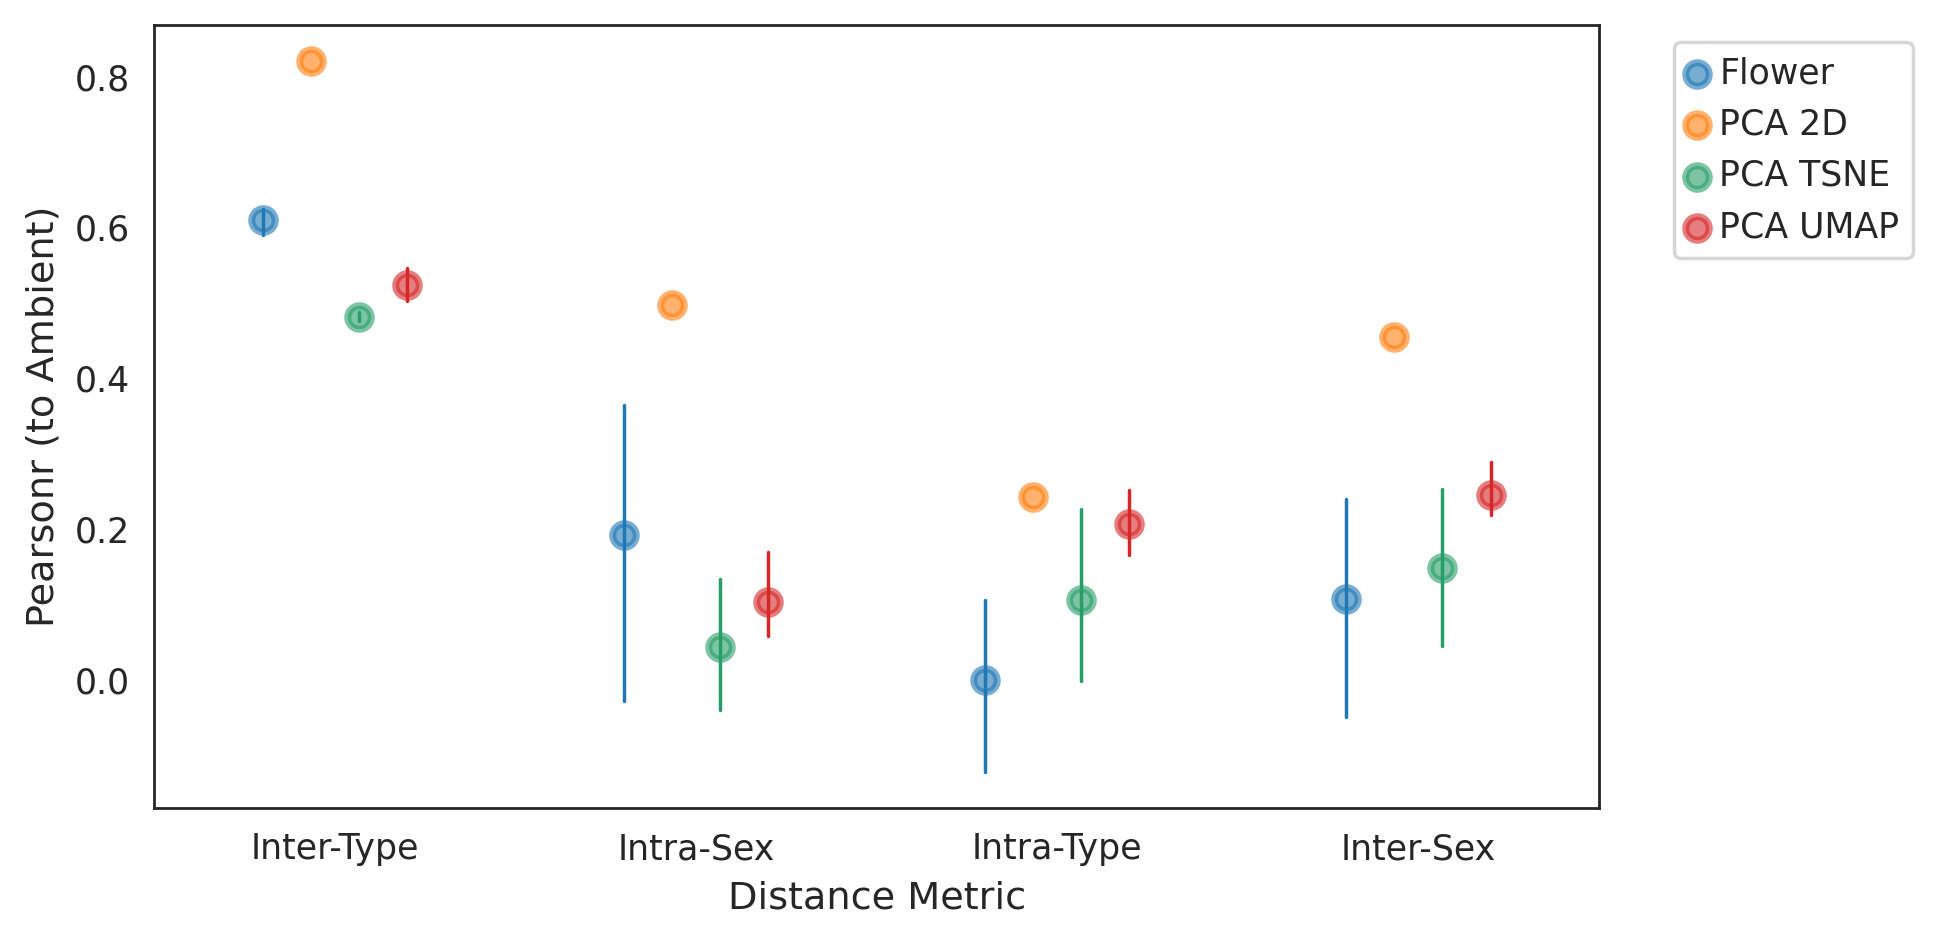

In [ ]:
plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10)

Compare Elephant Embedding Accuracy

In [ ]:
latents = el + latents

latentLab = elLab + latentLab

latentType = elType + latentType


In [ ]:
allVals = getAllVars(latents,latentLab,latentType)
allVals = allVals[~allVals['Latent'].isin(['Flower','PCA 50D','Map'])]

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

In [ ]:
toRemove = ['Intra-Sex','Inter-Sex']
subDistAllVals = subAllVals[~subAllVals['Distance'].isin(toRemove)]

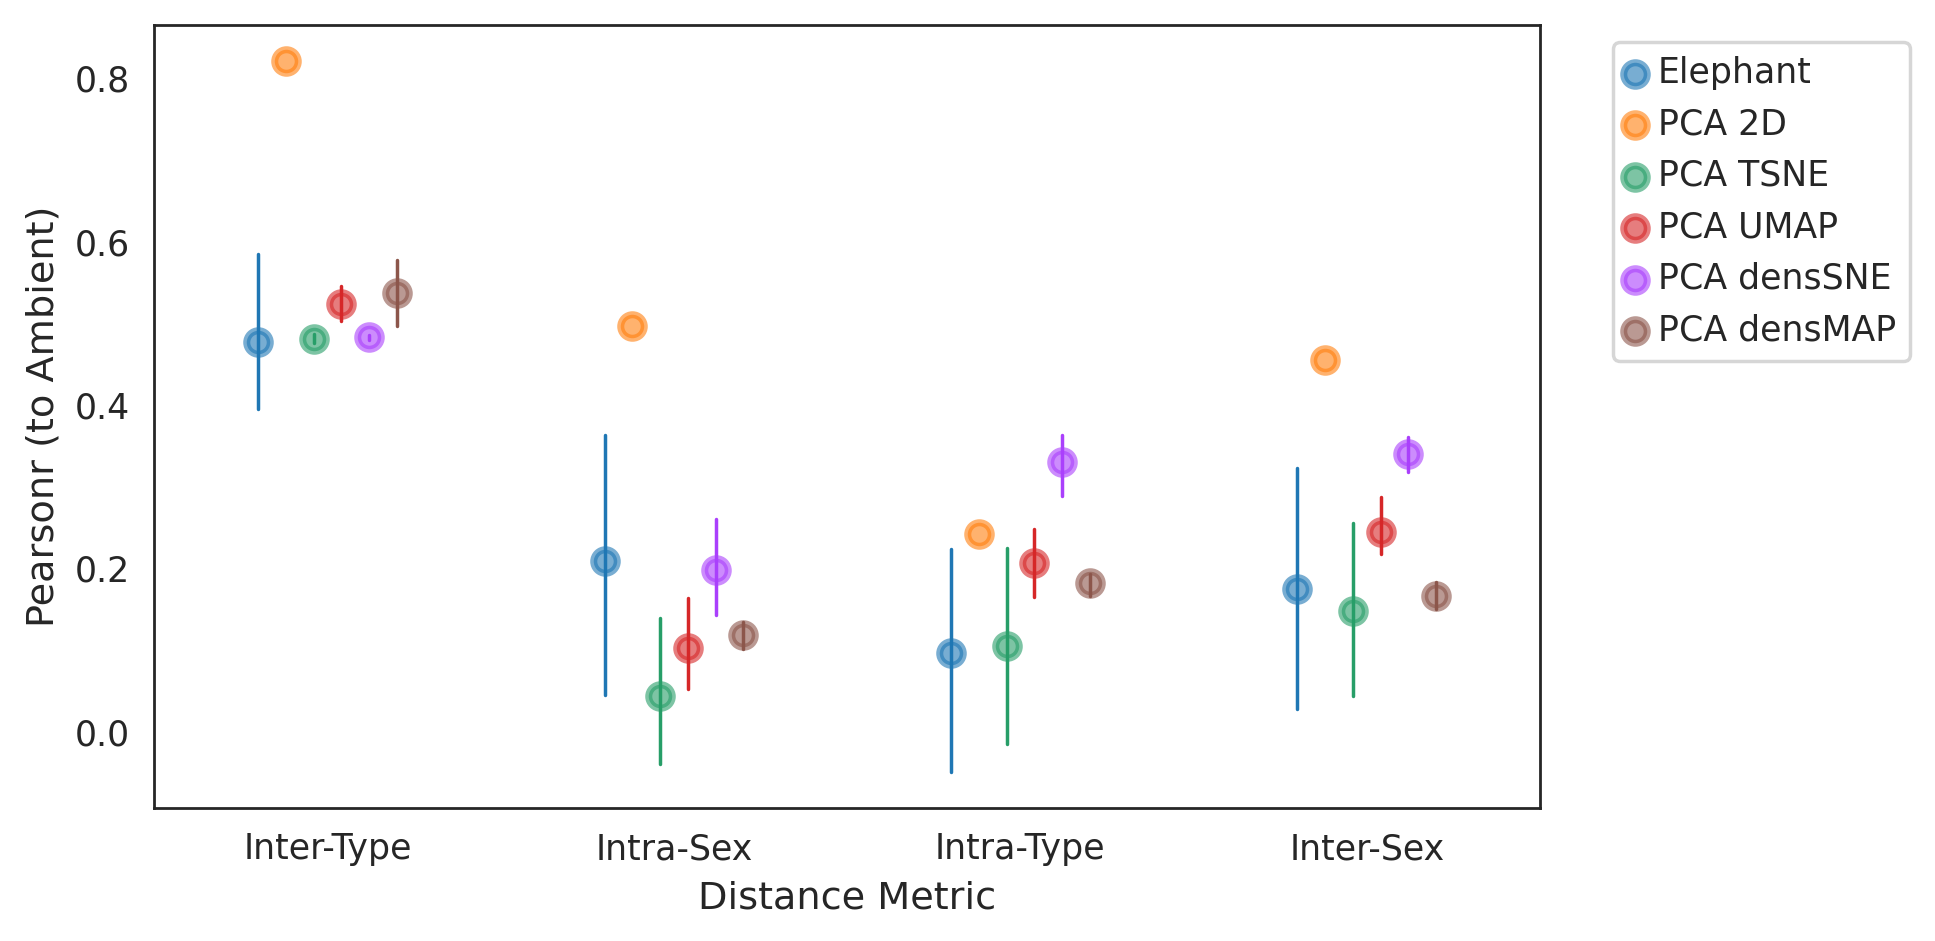

In [ ]:
plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10) #0.15

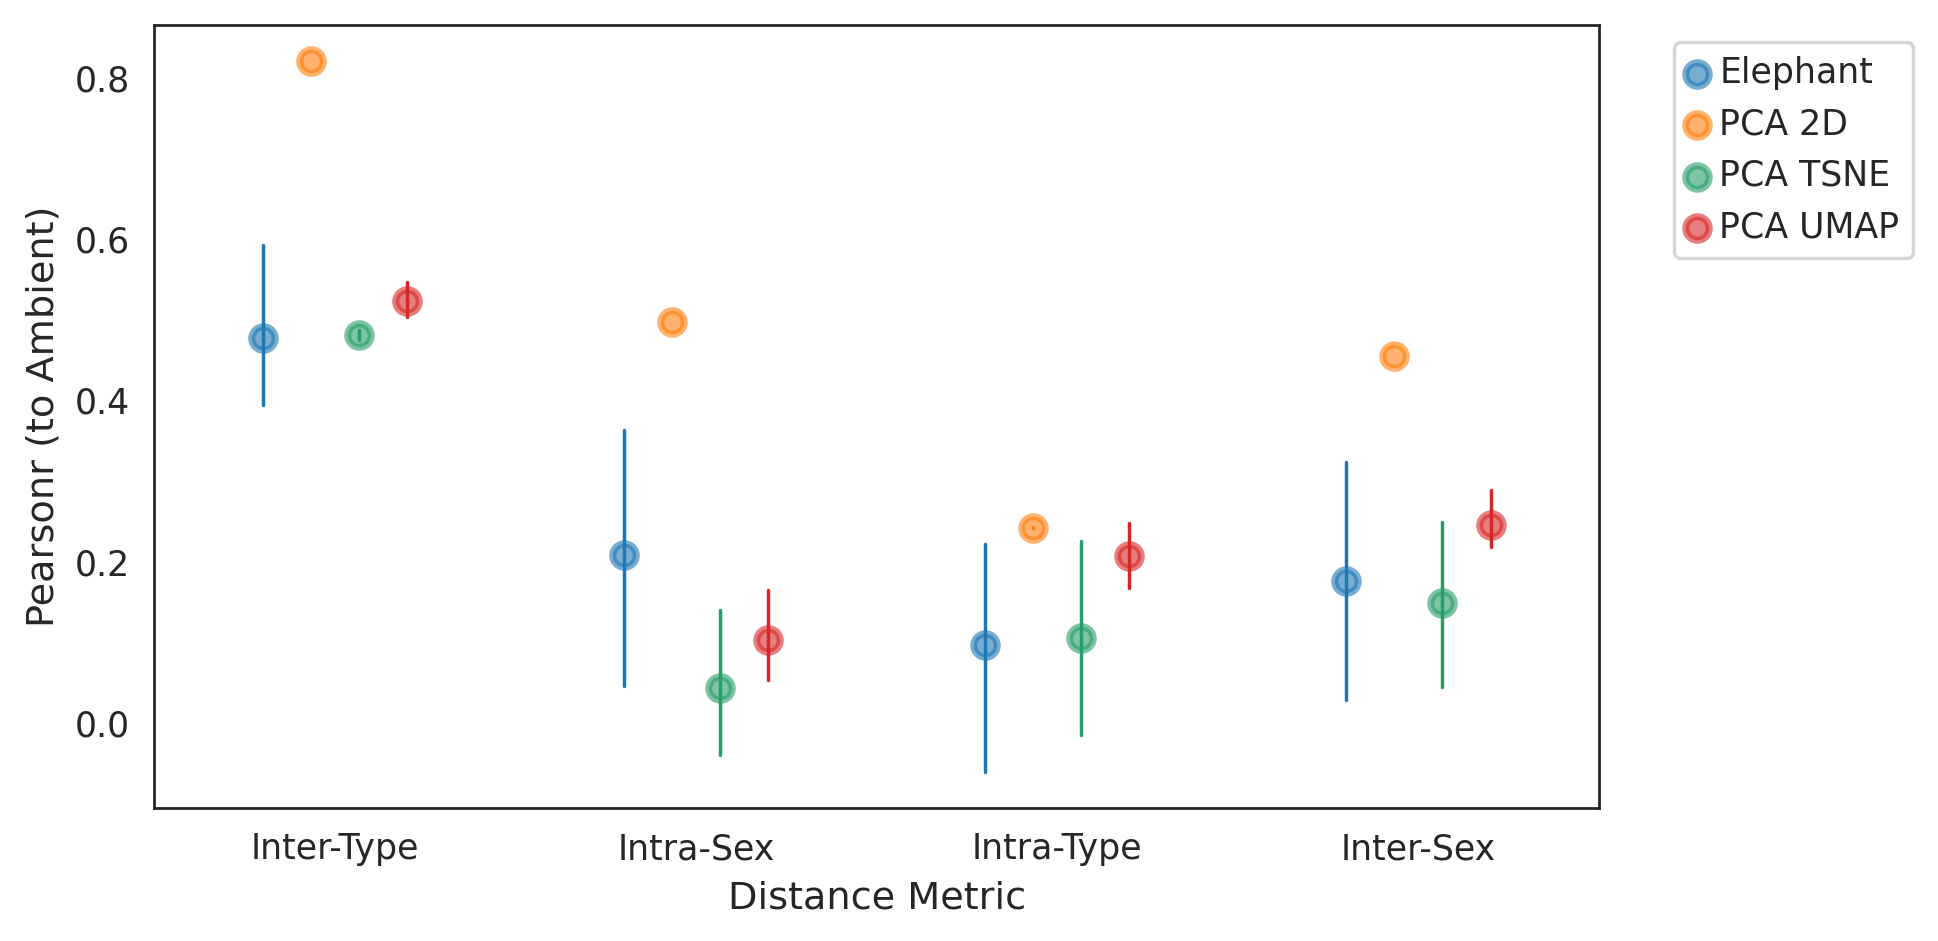

In [ ]:
plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10)

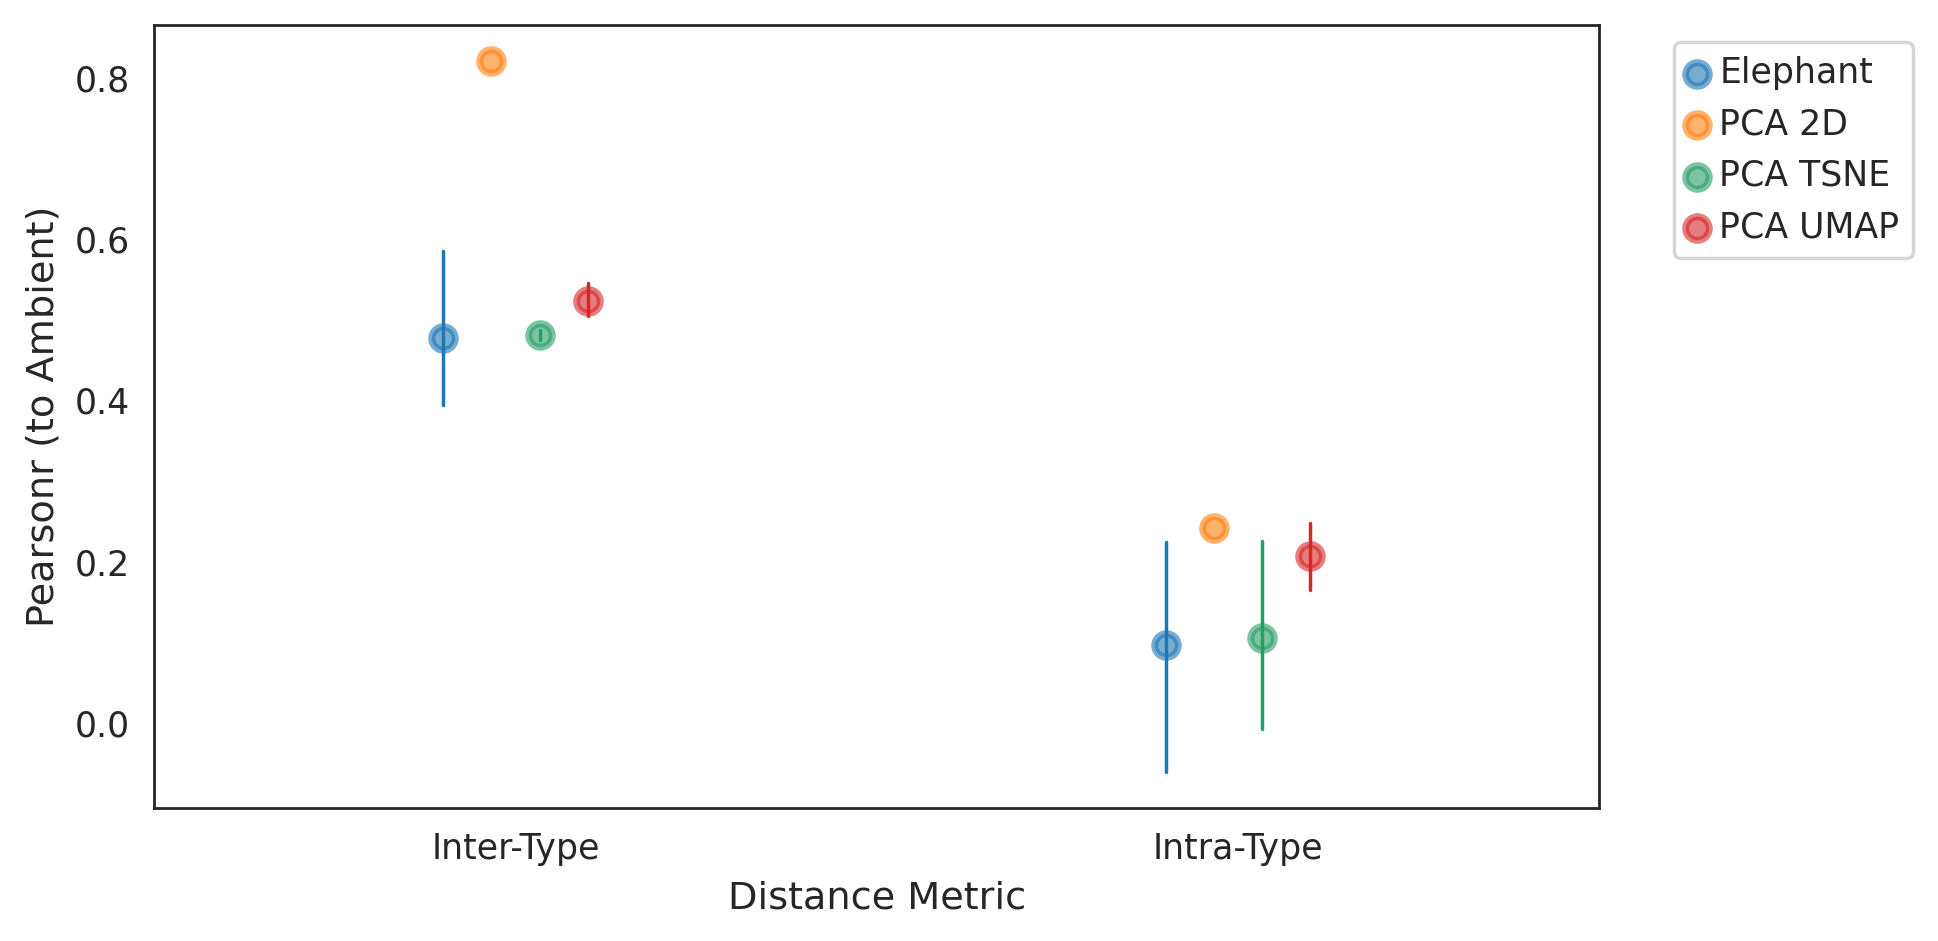

In [ ]:
plotLatentStats(subDistAllVals, axisFontSize = 11, tickFontSize = 10,dodge=0.2,)

In [ ]:
from google.colab import files

allVals.to_csv('smartSeqElVals.csv')
#files.download('smartSeqElVals.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Compare map embedding

In [ ]:
latents = map + latents #[1:]

latentLab = mapLab + latentLab #[1:]

latentType = mapType + latentType #[1:]

In [ ]:
allVals = getAllVars(latents,latentLab,latentType)
allVals = allVals[~allVals['Latent'].isin(['Elephant','Flower','PCA 50D'])]

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

In [ ]:
toRemove = ['Intra-Sex','Inter-Sex']
subDistAllVals = subAllVals[~subAllVals['Distance'].isin(toRemove)]

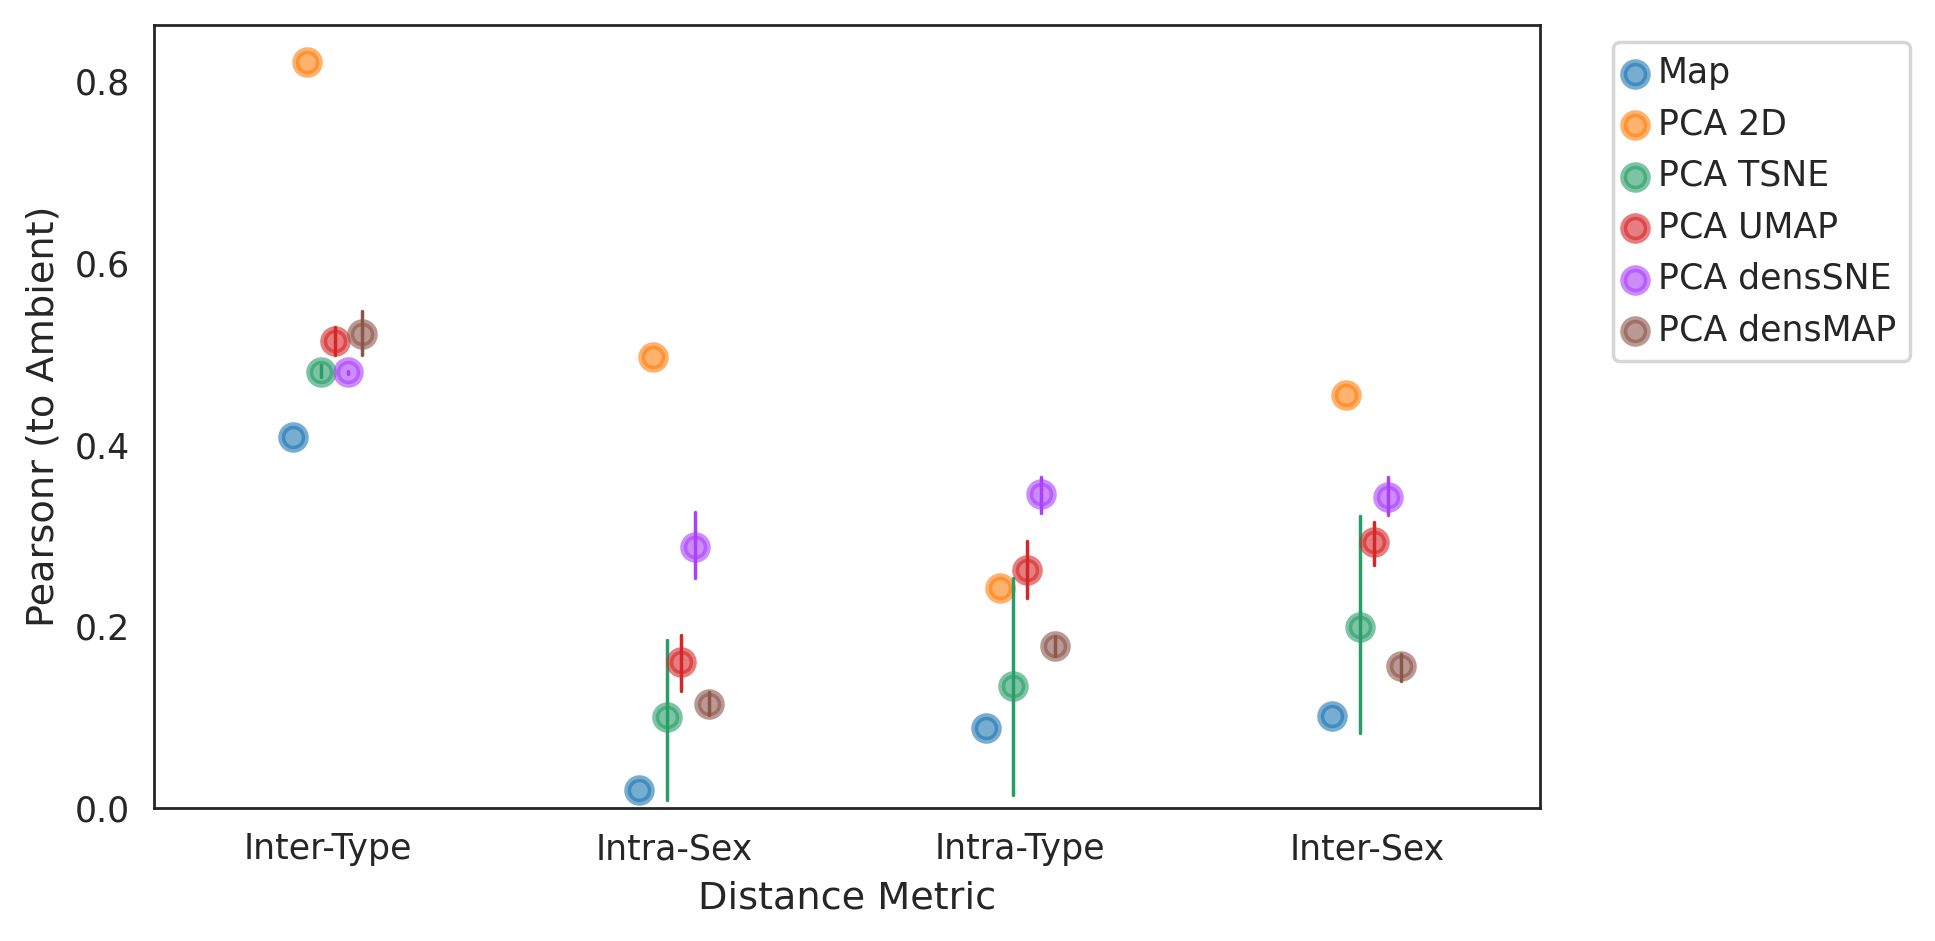

In [ ]:
vis.plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10, dodge=0.2) #0.44 ok 

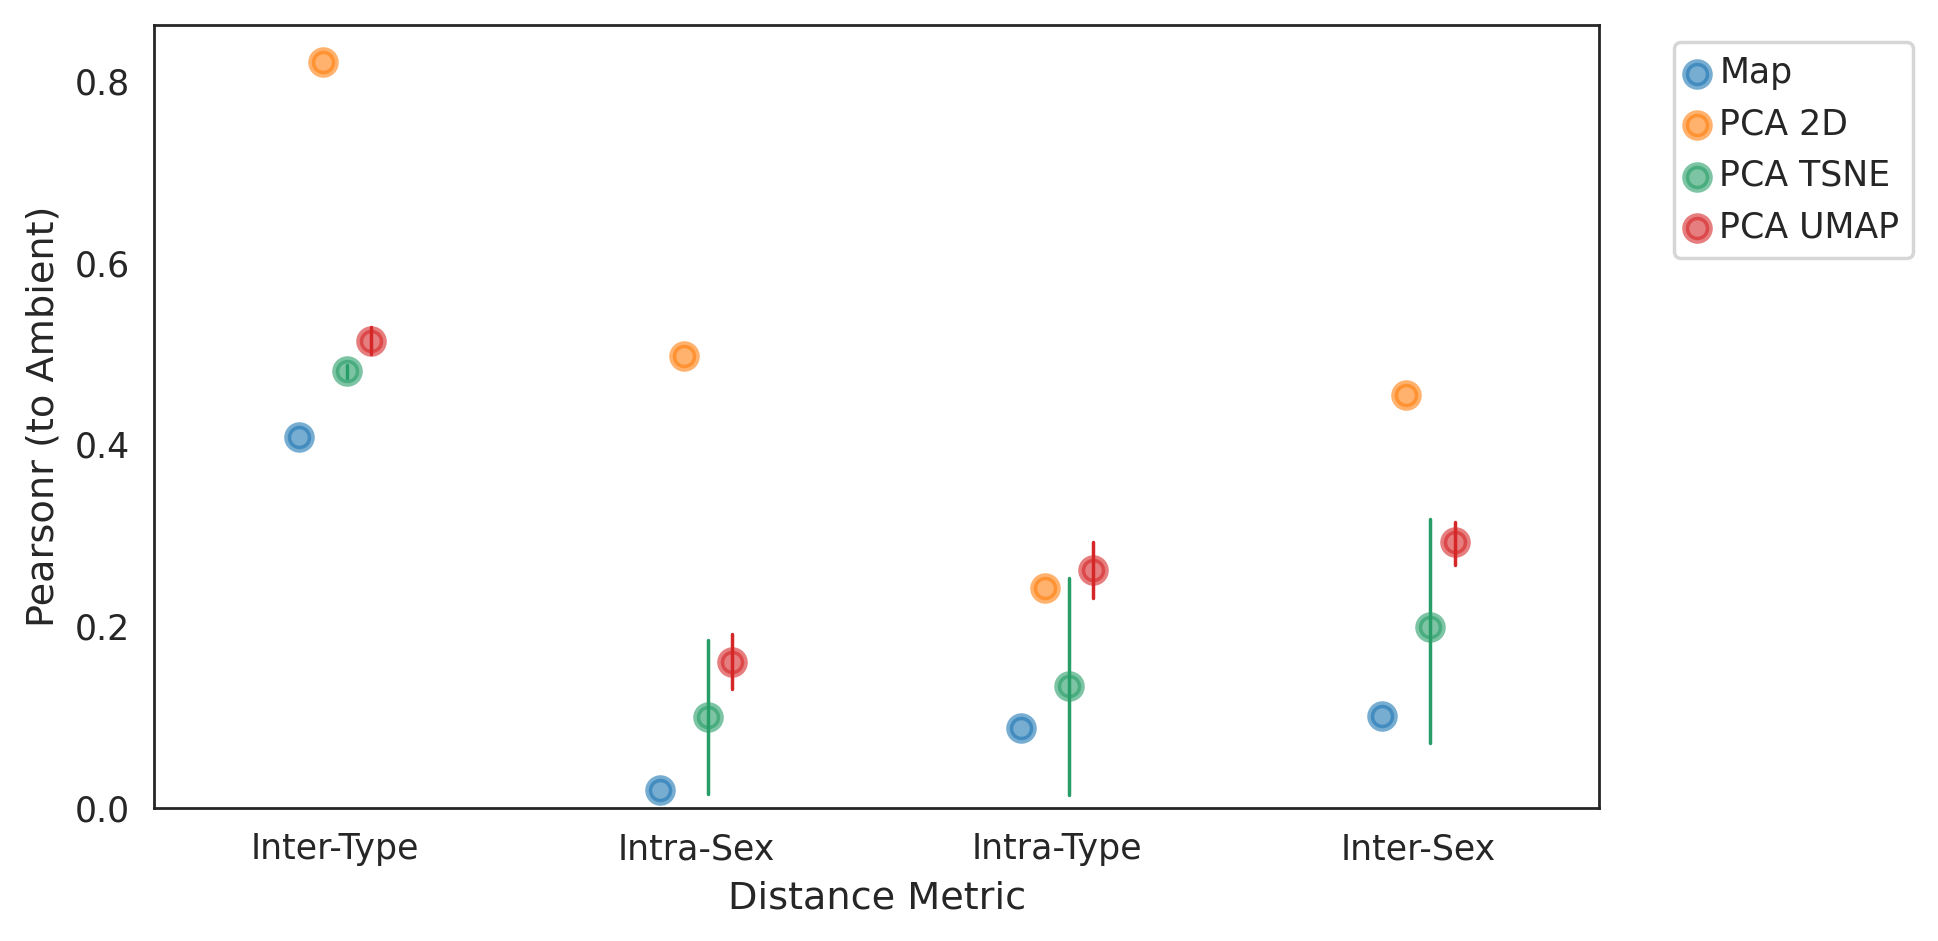

In [ ]:
vis.plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10, dodge=0.2)

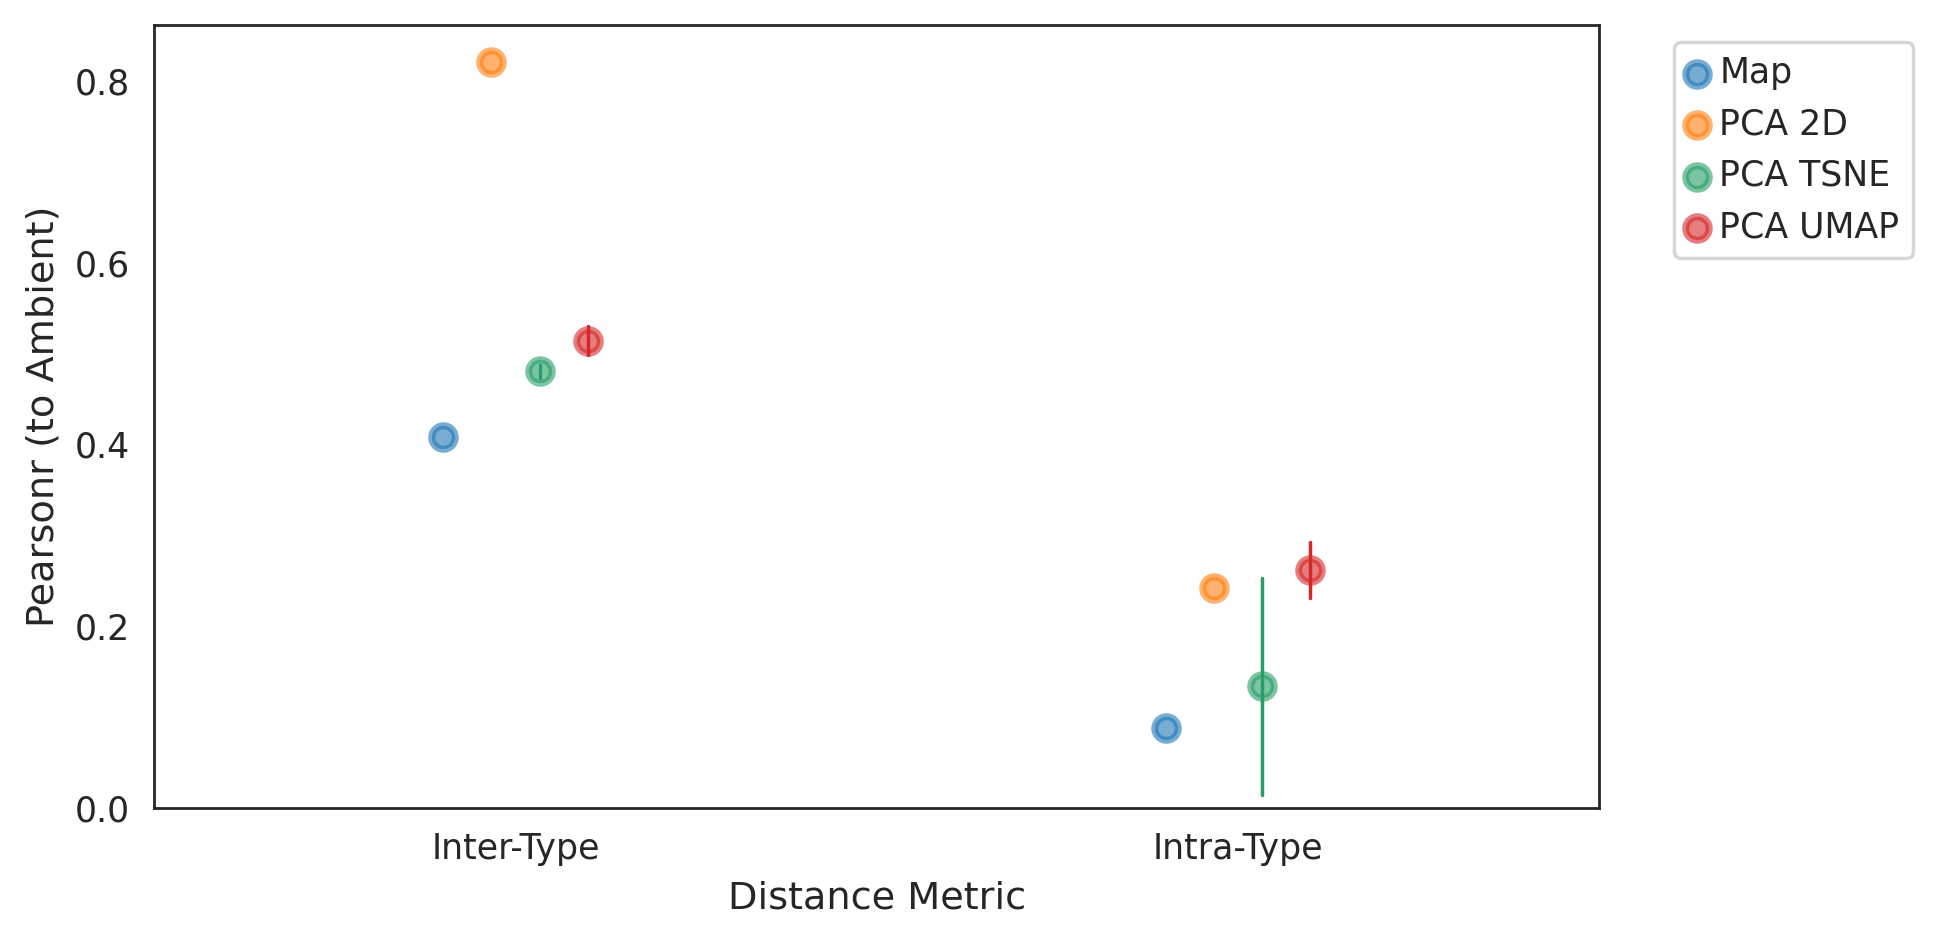

In [ ]:
vis.plotLatentStats(subDistAllVals, axisFontSize = 11, tickFontSize = 10, dodge=0.2)